# Variability of Higher-Order Network Statistics

In [1]:
# load all third part libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import bct
import scipy as sp
import scipy.stats
import networkx as nx

In [2]:
# load networks
mplex2 = np.load('/Users/nick/desktop/mplex/data/mplex300_partial.npy') # normalized already
#mplex2 = mplex2.reshape(820,300,300)
#print mplex_orig.shape
mplex1 = np.load('/Users/nick/desktop/mplex/data/mplex300.npy') # shape = (820,300,300) # not normalized
mplex1_unnorm = mplex1.copy()
# load subject id's
#subjects = np.loadtxt('/Users/nick/desktop/mplex/data/subjectIDs.txt',dtype=np.int64) # shape = (820,)
# load cogntive data
cog_head, cog_vals = np.load('/Users/nick/desktop/mplex/data/demo.npy')

male_indices = np.where(cog_vals[:,3]=='M')[0]
female_indices = np.where(cog_vals[:,3]=='F')[0]

len_m = len(male_indices)
len_f = len(female_indices)

mplex1_m = mplex1[male_indices,:]
mplex2_m = mplex2[male_indices,:]
mplex1_f = mplex1[female_indices,:]
mplex2_f = mplex2[female_indices,:]

In [3]:
for i in range(len_m):
    mplex1_m[i,:,:] = (mplex1_m[i,:,:] - np.mean(mplex1_m[i,:,:]))/np.std(mplex1_m[i,:,:])
    np.fill_diagonal(mplex1_m[i,:,:],0)
for i in range(len_f):
    mplex1_f[i,:,:] = (mplex1_f[i,:,:] - np.mean(mplex1_f[i,:,:]))/np.std(mplex1_f[i,:,:])
    np.fill_diagonal(mplex1_f[i,:,:],0)

In [4]:
def gen_null(mplex):
    mp = mplex.copy()
    for i in range(mp.shape[0]):
        if i % 100 == 0 : print '%i/%i' %(i,mp.shape[0])
        mp[i,:,:] = bct.randmio_und(mp[i,:,:],5)[0]
    return mp

def z_norm(x):
    """
    Normalize values to be z-scores
    """
    for i in range(820):
        x[i,:,:] = (x[i,:,:] - np.mean(x[i,:,:])) / np.std(x[i,:,:])
    x[x<0] = 0
    return x

def ref_norm(x,y, cut = 4):
    xx = (x - np.mean(x)) / np.std(x)
    xx[xx<-cut] = -cut
    xx[xx>cut] = cut
    yy = (y - np.mean(x)) / np.std(y)
    return xx,yy

def bhat_distance(p,q):
    sp2 = np.var(p)
    sq2 = np.var(q)
    mp = np.mean(p)
    mq = np.mean(q)
    return round(0.25*np.log(0.25*((sp2/sq2)+(sq2/sp2)+2)) + 0.25*((mp-mq)**2 / (sp2+sq2)),3)

In [20]:
%matplotlib inline
def plot_together(allvals,mlabels,glabels=['Male','Female']):
    """allvals.shape = (num_mplex, num_subjects, num_metrics)"""
    for midx in range(allvals.shape[2]):
        for i in range(4):
            net1 = allvals[i,:,midx]
            net1 = net1[net1!=0]
            net2 = allvals[i+4,:,midx]
            net2 = net2[net2!=0]
            n1 = net1.copy()
            norm_mean = np.mean(n1)
            norm_std = np.std(n1)
            net1 = (net1 - norm_mean) / np.std(net1)
            net2 = (net2 - norm_mean) / np.std(net2)
            _min = min(np.min(net1),np.min(net2))
            _max = max(np.max(net1),np.max(net2))
            plt.figure(figsize=(7,5))
            bins= np.linspace(_min,_max,100)
            plt.hist(net1,label=glabels[0],bins=bins,normed=True,alpha=0.5)
            plt.hist(net2,label=glabels[1],bins=bins,normed=True,alpha=0.5)
            plt.xlabel('Brain Network Z-values')
            plt.ylabel('Normalized Bin Frequency')
            plt.legend(loc='best')
            plt.title('Male/Female : %s' % mlabels[midx])
            plt.show()

In [6]:
thresh = 3

## male

mp0 = mplex1_m.copy()
mp0[mp0 < thresh] = 0
mp0[mp0 >= thresh] = 1
for i in range(mp0.shape[0]): np.fill_diagonal(mp0[i,:,:],0)
mp0_null = gen_null(mp0)

mp1 = mplex1_m.copy()
mp1[mp1 < thresh] = 0
for i in range(mp1.shape[0]): np.fill_diagonal(mp1[i,:,:],0)
mp1_null = gen_null(mp1)

mp3 = mplex2_m.copy()
mp3[mp3 < thresh] = 0
mp3[mp3 >= thresh] = 1
for i in range(mp3.shape[0]): np.fill_diagonal(mp3[i,:,:],0)
mp3_null = gen_null(mp3)

mp4 = mplex2_m.copy()
mp4[mp4 < thresh] = 0
for i in range(mp4.shape[0]): np.fill_diagonal(mp4[i,:,:],0)
mp4_null = gen_null(mp4)

## female

mp6 = mplex1_f.copy()
mp6[mp6 < thresh] = 0
mp6[mp6 >= thresh] = 1
for i in range(mp6.shape[0]): np.fill_diagonal(mp6[i,:,:],0)
mp6_null = gen_null(mp6)
    
mp7 = mplex1_f.copy()
mp7[mp7 < thresh] = 0
for i in range(mp7.shape[0]): np.fill_diagonal(mp7[i,:,:],0)
mp7_null = gen_null(mp7)

mp9 = mplex2_f.copy()
mp9[mp9 < thresh] = 0
mp9[mp9 >= thresh] = 1
for i in range(mp9.shape[0]): np.fill_diagonal(mp9[i,:,:],0)
mp9_null = gen_null(mp9)
    
mp10 = mplex2_f.copy()
mp10[mp10 < thresh] = 0
for i in range(mp10.shape[0]): np.fill_diagonal(mp10[i,:,:],0)
mp10_null = gen_null(mp10)

print 'Done Loading'

mp_list = [mp0,mp1,mp3,mp4,mp6,mp7,mp9,mp10]
mp_list_null = [mp0_null,mp1_null,mp3_null,mp4_null,mp6_null,mp7_null,mp9_null,mp10_null]

0/366
100/366
200/366
300/366
0/366
100/366
200/366
300/366
0/366
100/366
200/366
300/366
0/366
100/366
200/366
300/366
0/453
100/453
200/453
300/453
400/453
0/453
100/453
200/453
300/453
400/453
0/453
100/453
200/453
300/453
400/453
0/453
100/453
200/453
300/453
400/453
Done Loading




Cognitive data pre-processing and function for testing correlation between cognitive data and network metrics:

In [7]:
def plot_hist(nb,labels,tag):
    for pidx in range(nb.shape[0]):
        plt.figure(figsize=(7,5))
        brain,random = ref_norm(nb[pidx,:,0],nb[pidx,:,1],cut=4)
        _min = min(np.min(brain),np.min(random))
        _max = max(np.max(brain),np.max(random))
        bins = np.linspace(_min,_max, 100)
        plt.hist(random,label='Null',bins=bins,normed=True,alpha=0.5)
        plt.hist(brain,label='Brain',bins=bins,normed=True,alpha=0.5)
        plt.title('%s: %s - Bhat Dist : %03f' % (tag,labels[pidx],bhat_distance(nb[pidx,:,0],nb[pidx,:,1])))        
        plt.xlabel('Brain Network Z-values')
        plt.ylabel('Normalized sBin Frequency')
        plt.legend(loc='best')
        plt.show()

## 1. Centrality

Here, we test full (mplex1) and partial (mplex2) correlation networks using various centrality measures. We perform this analysis for binary, thresholded normalized, and unthresholded normalized versions of each network.

For each metric that returns a vector of values for each individual network, we will take the variance, the max, and the mean.

### 1A. Node Betweenness

Mplex : 0
0/366 
250/366 
Mplex : 1
0/366 
250/366 
Mplex : 2
0/366 
250/366 
Mplex : 3
0/366 
250/366 
Mplex : 4
0/453 
250/453 
Mplex : 5
0/453 
250/453 
Mplex : 6
0/453 
250/453 
Mplex : 7
0/453 
250/453 


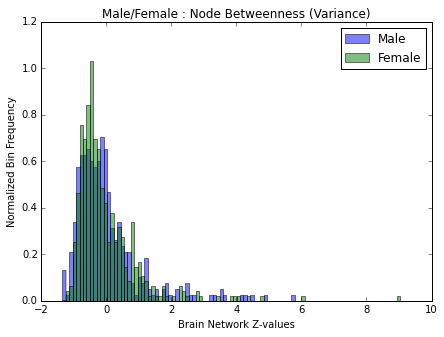

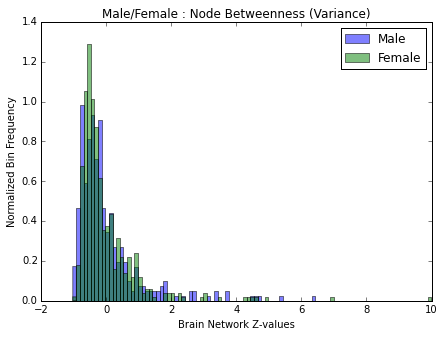

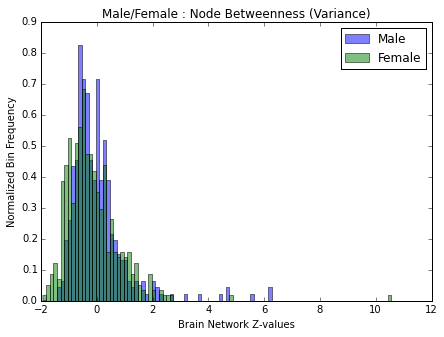

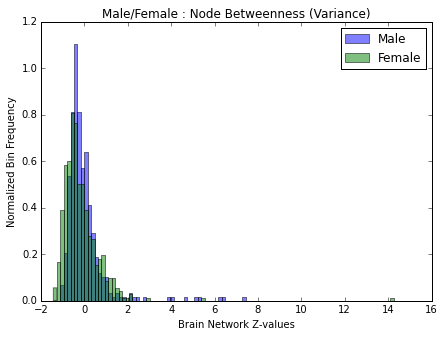

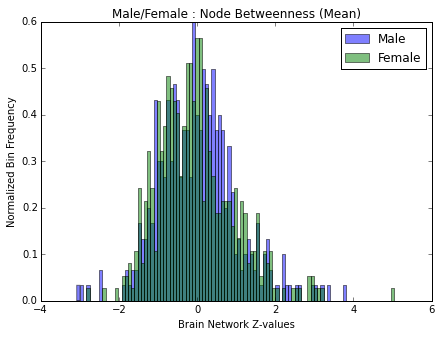

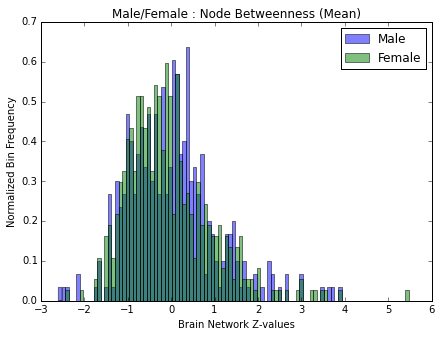

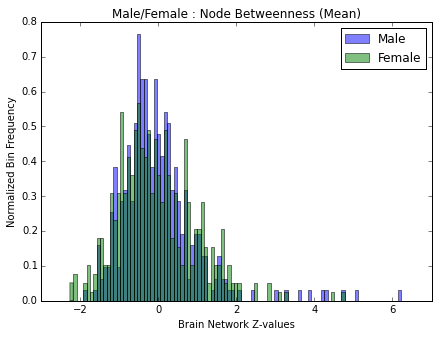

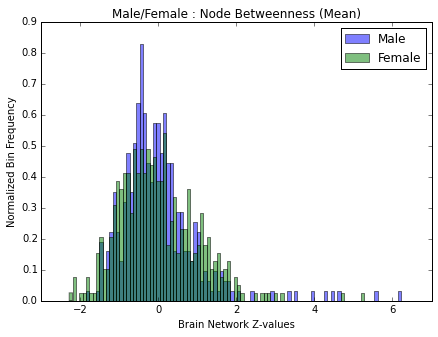

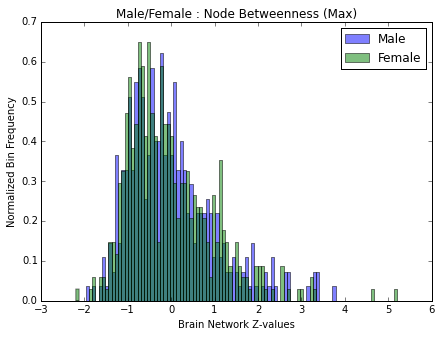

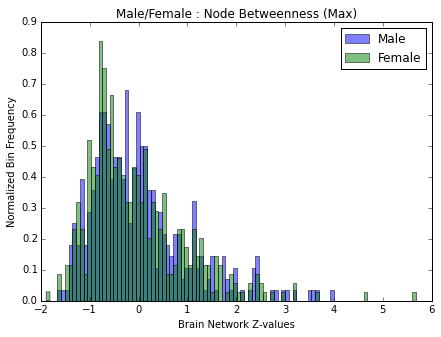

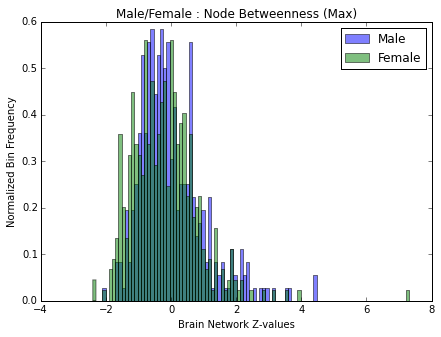

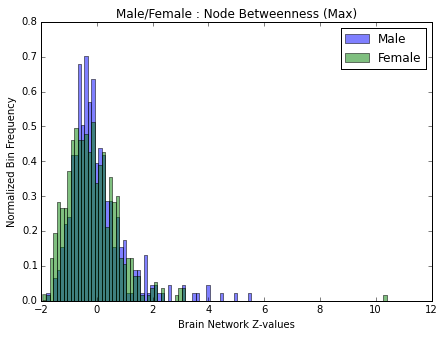

In [21]:
%matplotlib inline
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex :' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.betweenness_bin(net)
        btwn_null = bct.betweenness_bin(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'],'Male')
    #else:
     #   plot_hist(nb,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'],'Female')
plot_together(allvals,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'])

### 1B. PageRank

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


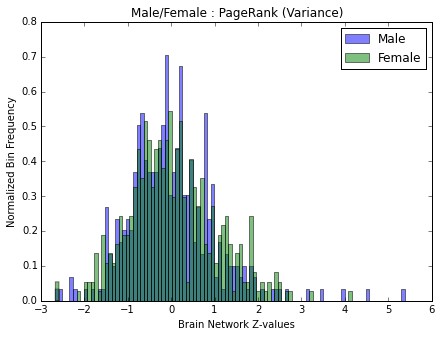

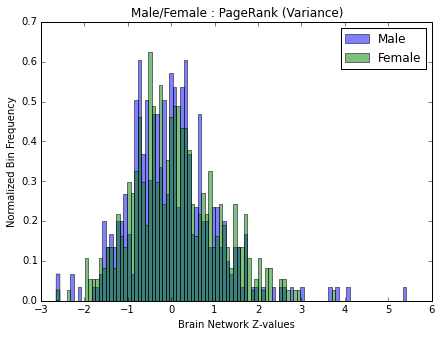

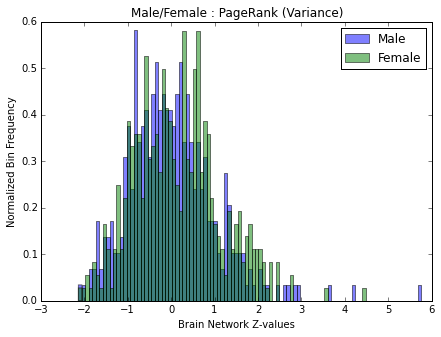

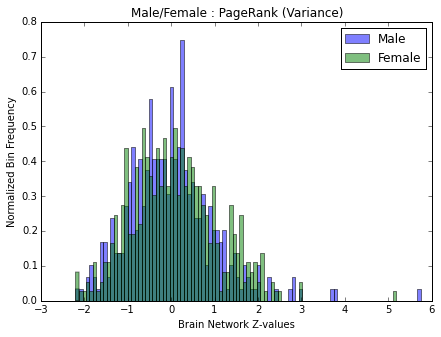

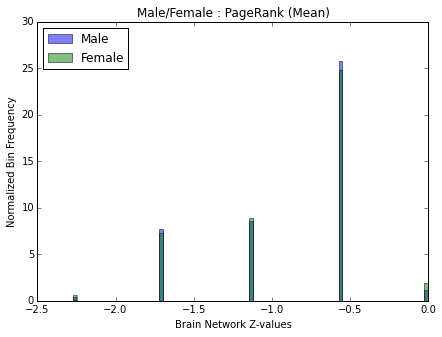

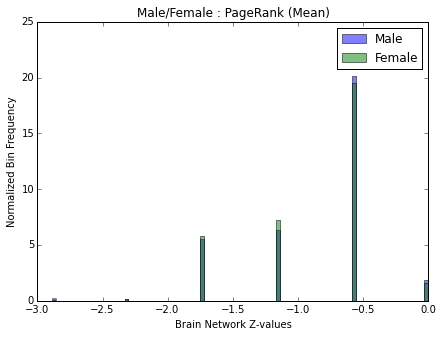

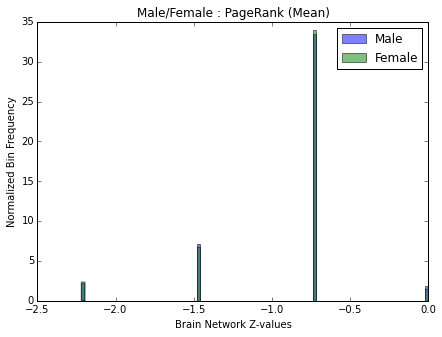

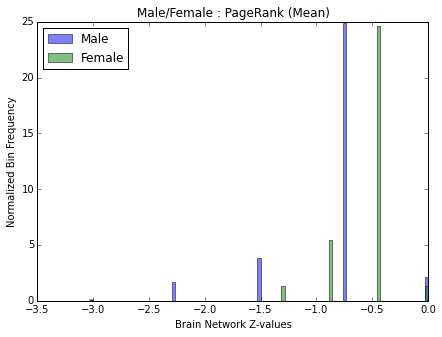

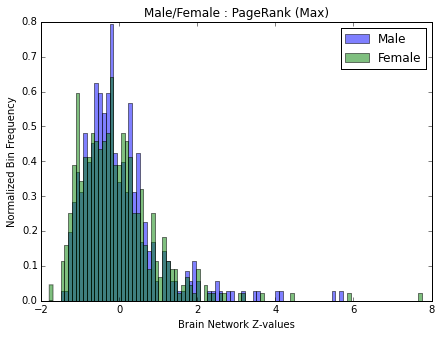

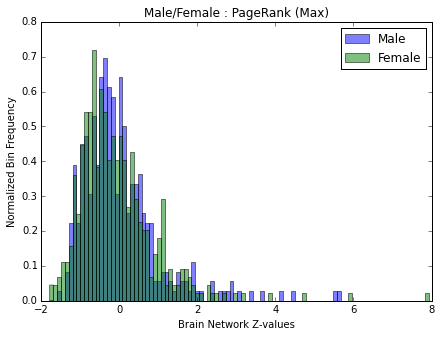

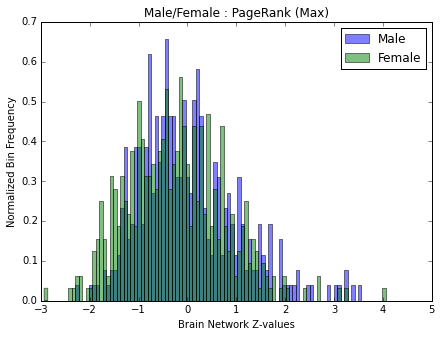

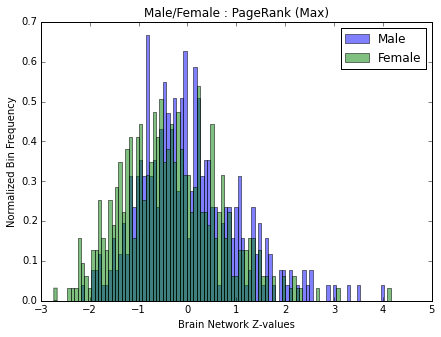

In [22]:
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.pagerank_centrality(net,0.85)
        btwn_null = bct.pagerank_centrality(null,0.85)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'],'Male')
    #else:
    #    plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'],'Female')
plot_together(allvals,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'] )

### 1C. Eigenvector Centrality

Mplex :  0
0/366 
250/366 


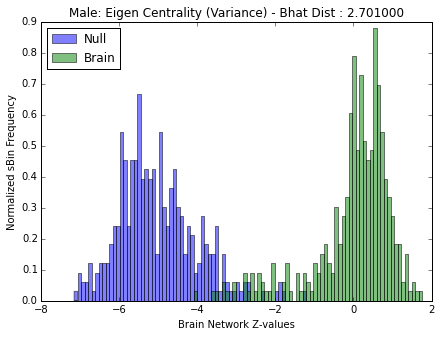

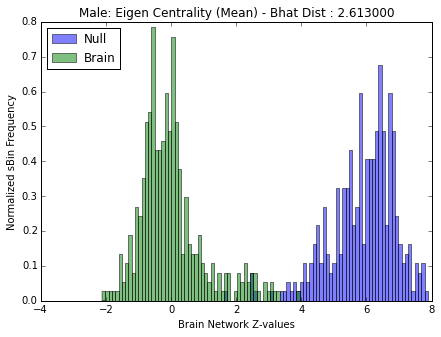

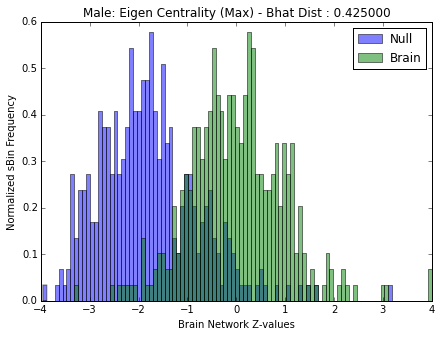

Mplex :  1
0/366 
250/366 


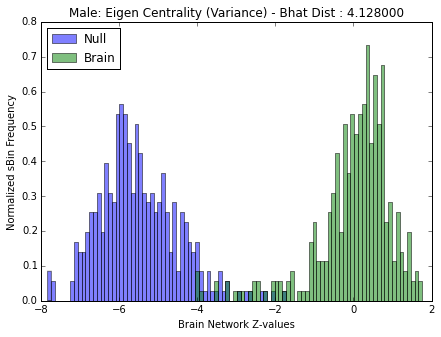

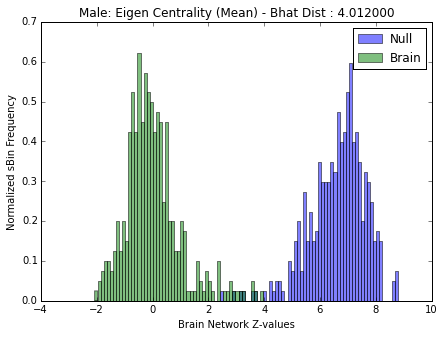

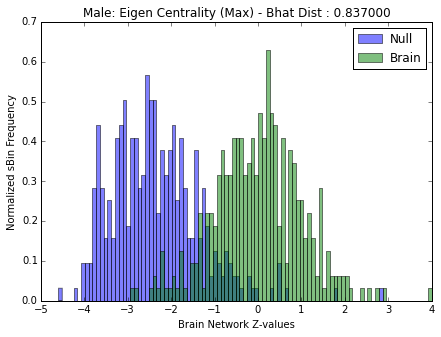

Mplex :  2
0/366 
250/366 


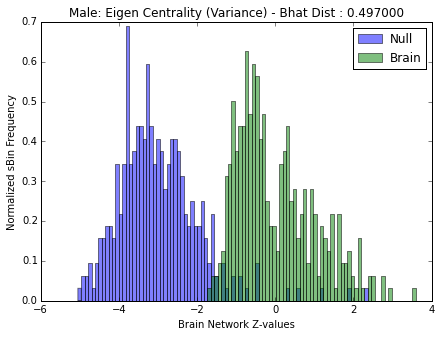

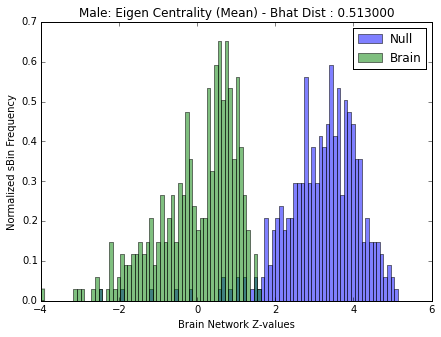

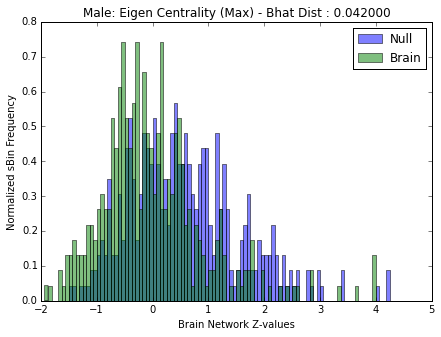

Mplex :  3
0/366 
250/366 


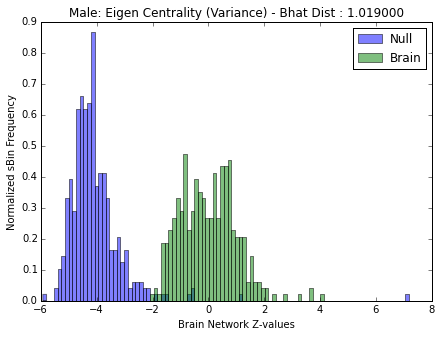

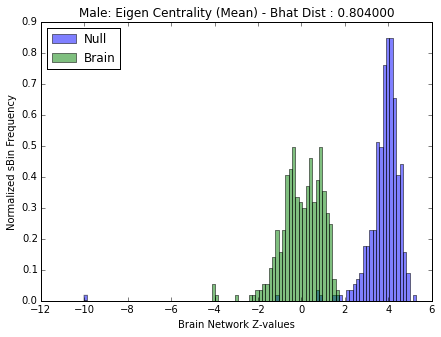

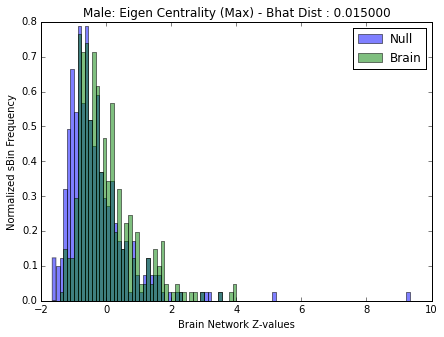

Mplex :  4
0/453 
250/453 


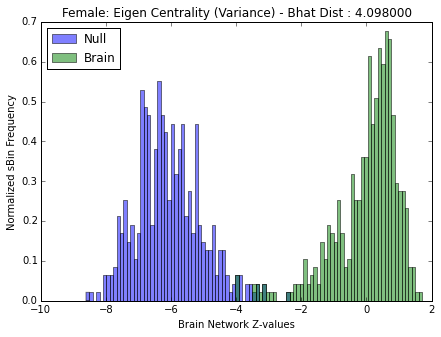

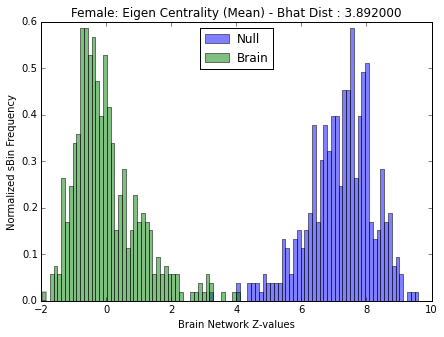

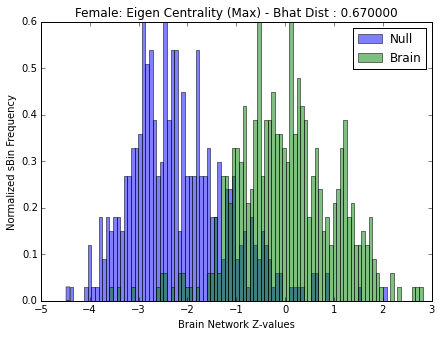

Mplex :  5
0/453 
250/453 


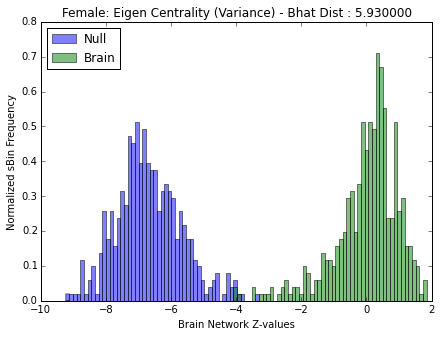

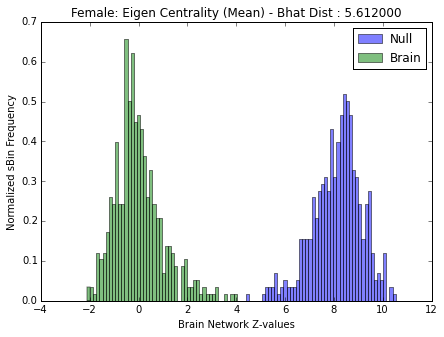

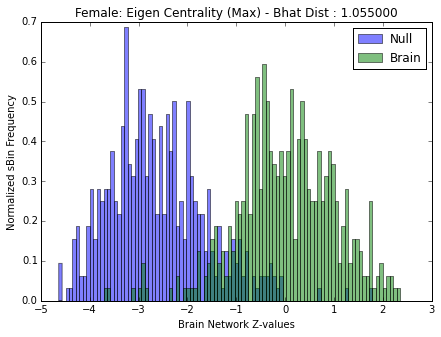

Mplex :  6
0/453 
250/453 


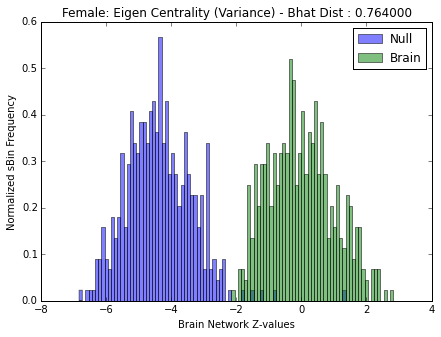

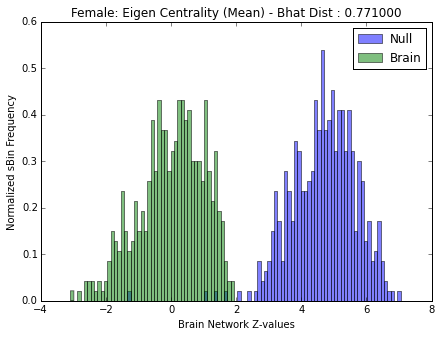

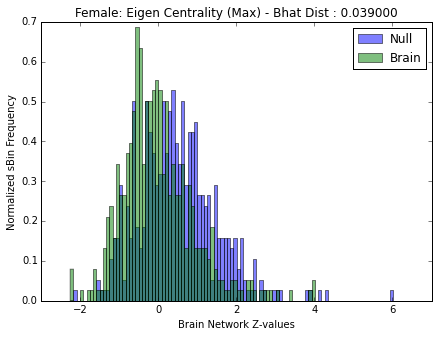

Mplex :  7
0/453 
250/453 


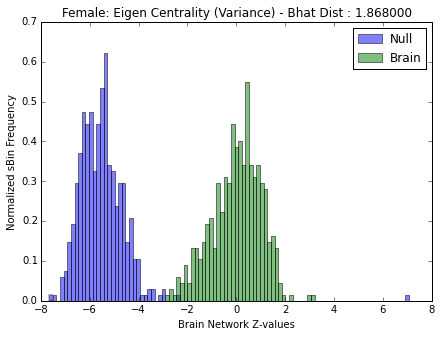

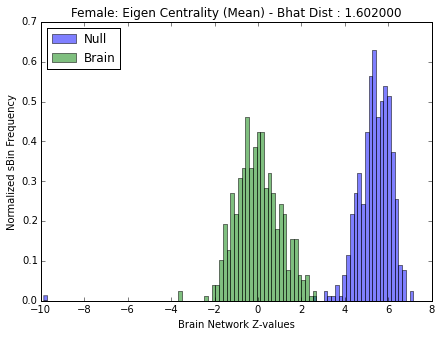

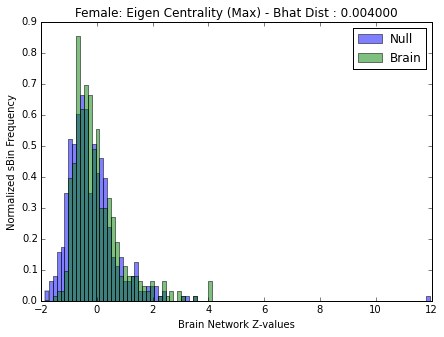

In [23]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.eigenvector_centrality_und(net)
        btwn_null = bct.eigenvector_centrality_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if mp_idx < 4:
        plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'],'Male')
    else:
        plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'],'Female')

## 2. Clustering

### 2A. Clustering Coefficienct

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


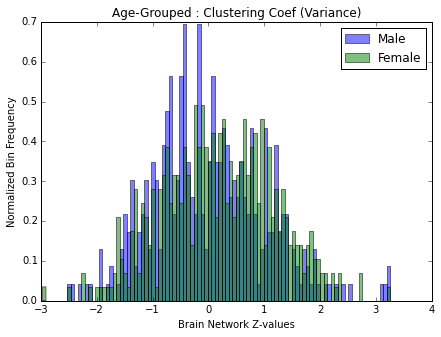

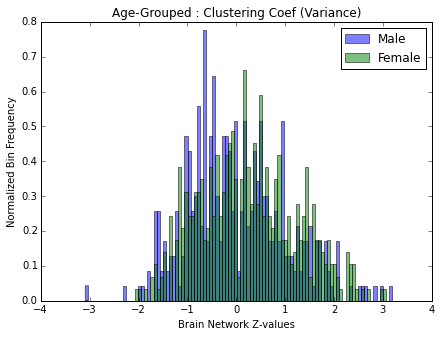

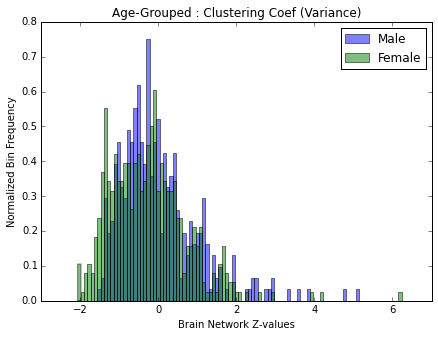

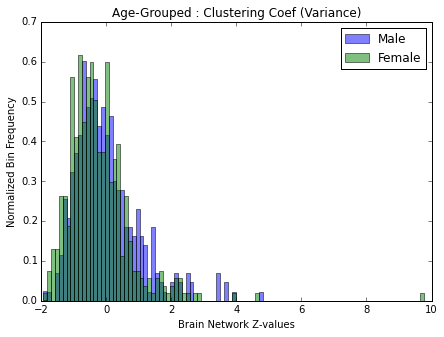

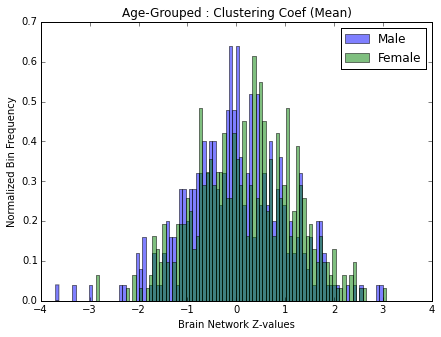

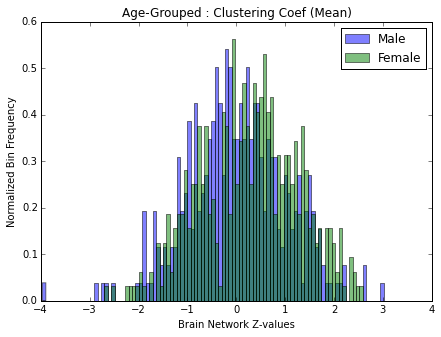

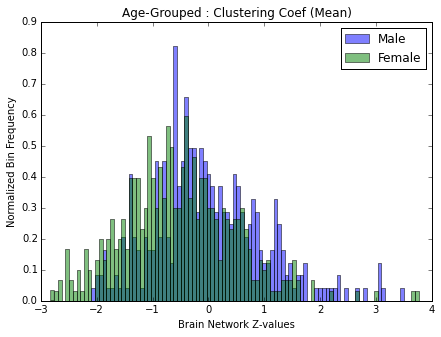

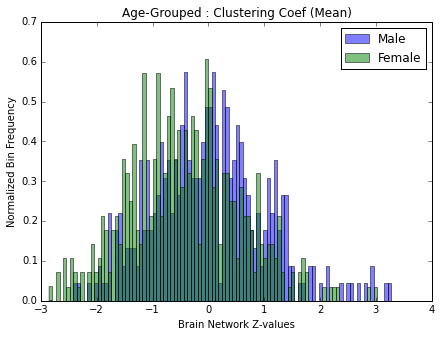

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:195: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():


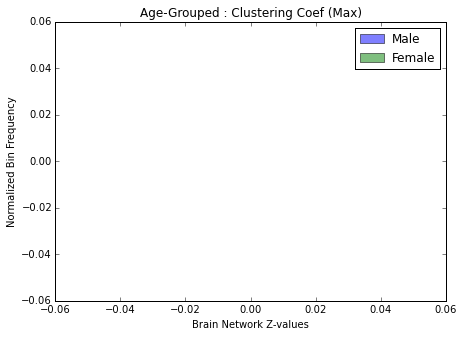

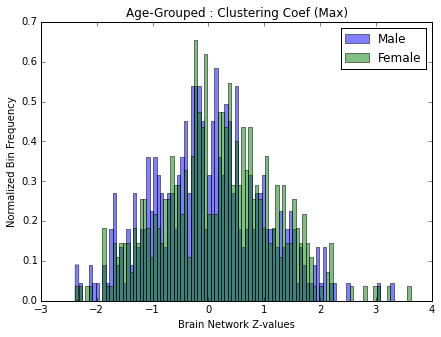

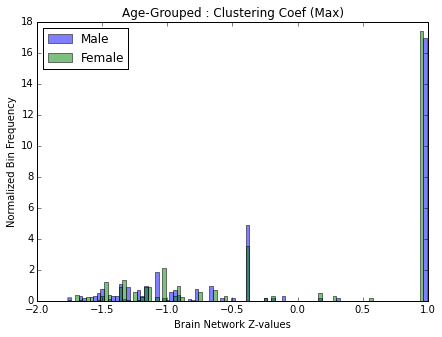

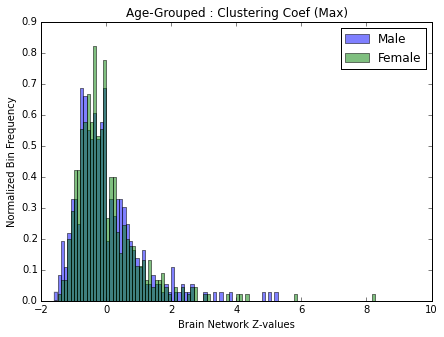

In [8]:
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]   
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.clustering_coef_bu(net)
        btwn_null = bct.clustering_coef_bu(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'],'Male')
    #else:
      #  plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'],'Female')
plot_together(allvals,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'])

### 2B. Transitivity

Mplex :  0
0/366 
250/366 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


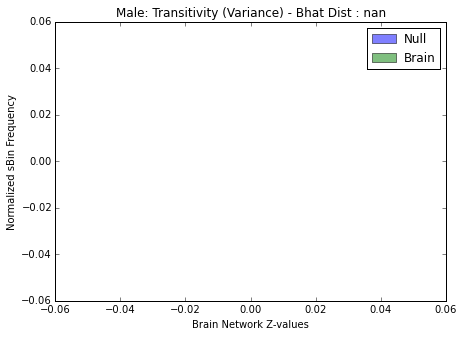

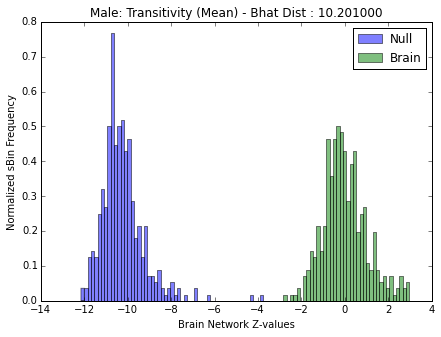

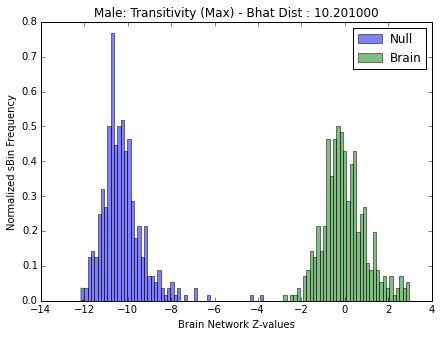

Mplex :  1
0/366 
250/366 


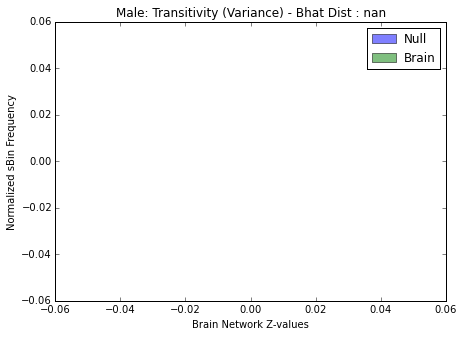

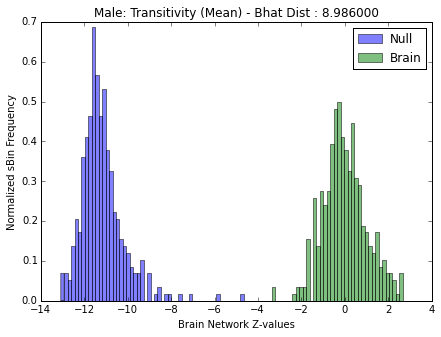

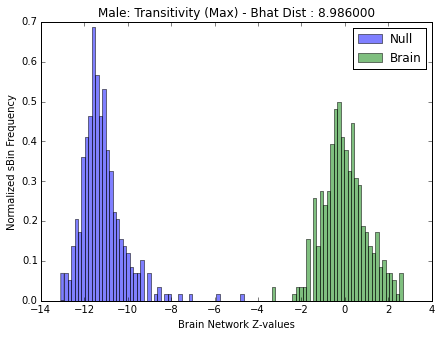

Mplex :  2
0/366 
250/366 


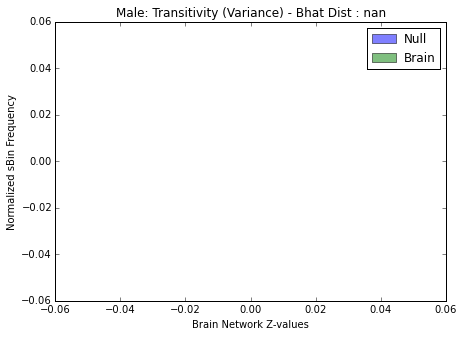

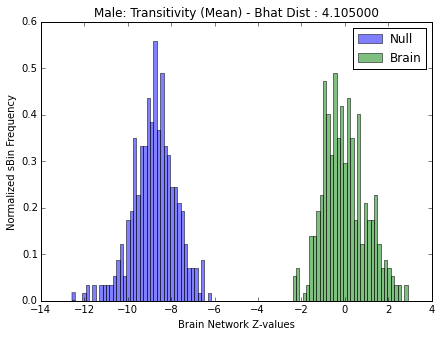

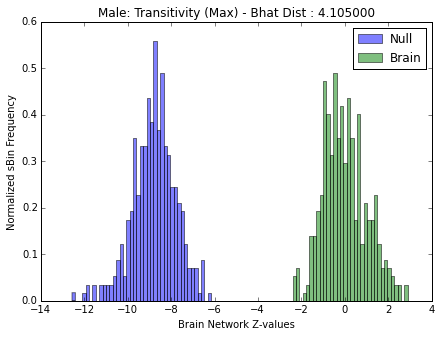

Mplex :  3
0/366 
250/366 


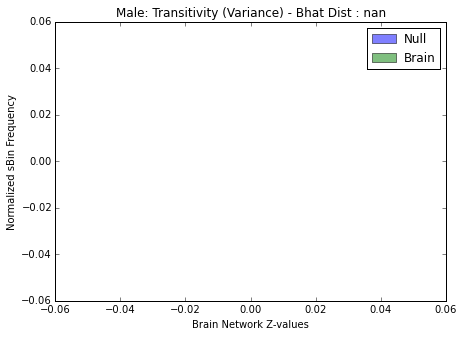

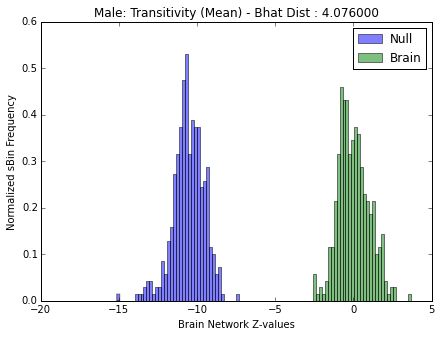

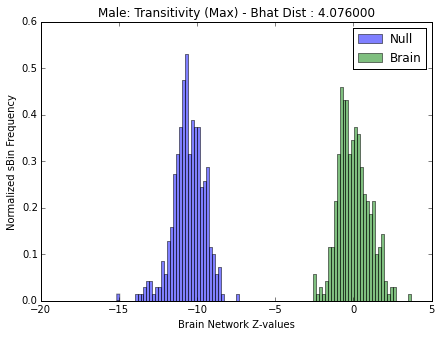

Mplex :  4
0/453 
250/453 


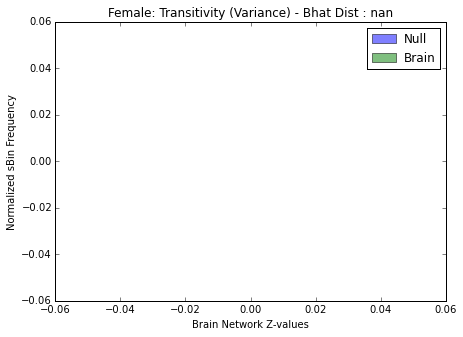

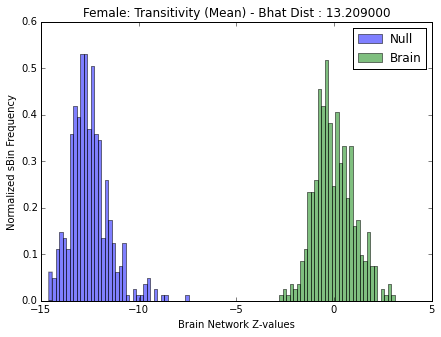

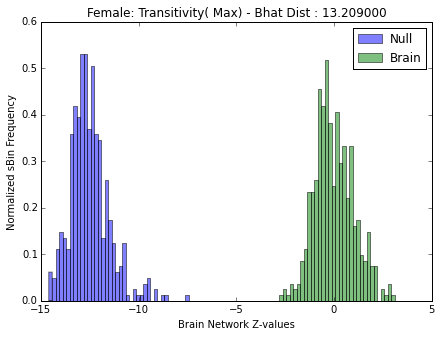

Mplex :  5
0/453 
250/453 


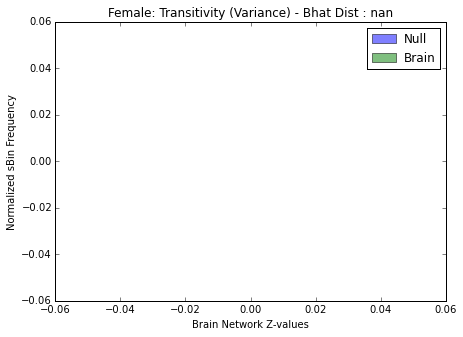

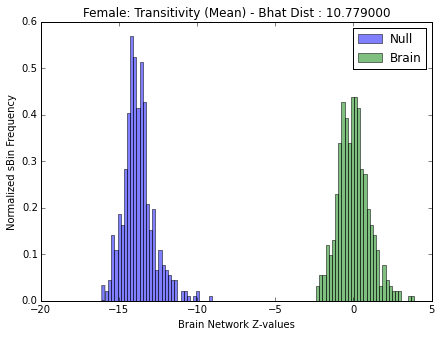

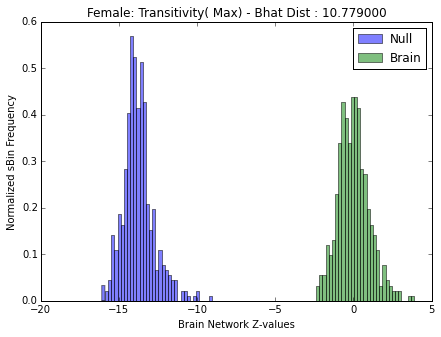

Mplex :  6
0/453 
250/453 


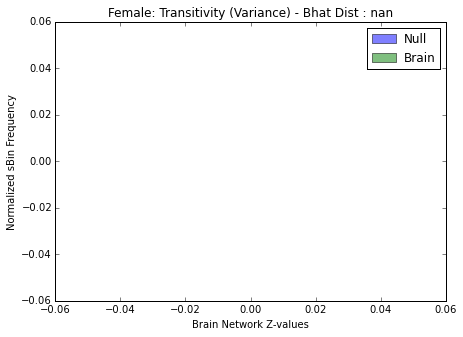

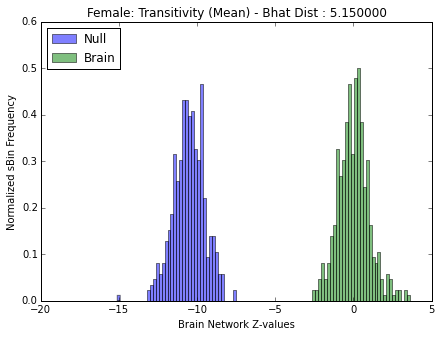

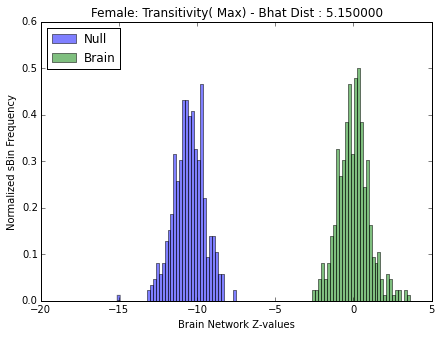

Mplex :  7
0/453 
250/453 


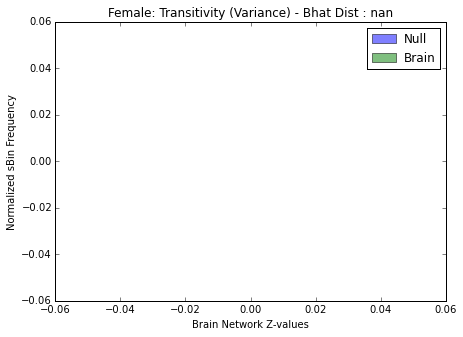

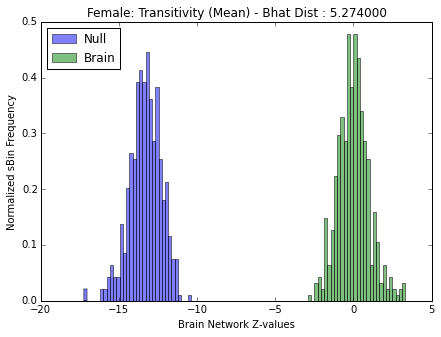

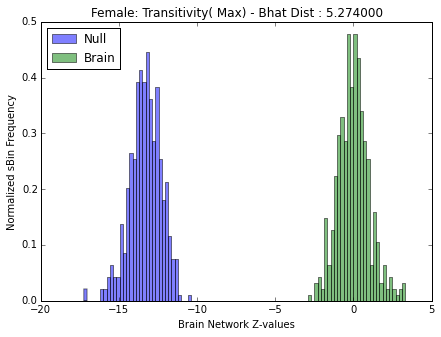

In [25]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.transitivity_bu(net)
            btwn_null = bct.transitivity_bu(null)
        else:
            btwn = bct.transitivity_wu(net)
            btwn_null = bct.transitivity_wu(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if mp_idx < 4:
        plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity (Max)'],'Male')
    else:
        plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity( Max)'],'Female')

## 3. Core

### 3A. Assortativity

Mplex :  0
0/366 
250/366 


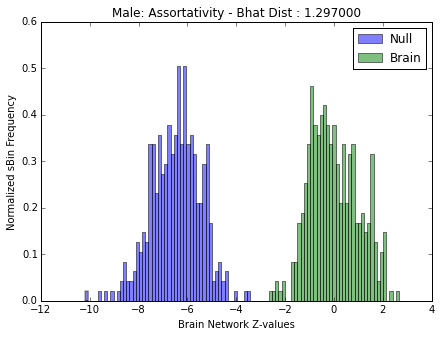

Mplex :  1
0/366 
250/366 


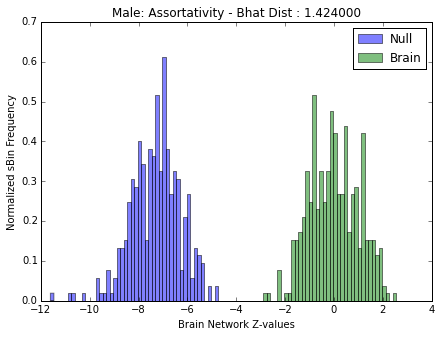

Mplex :  2
0/366 
250/366 


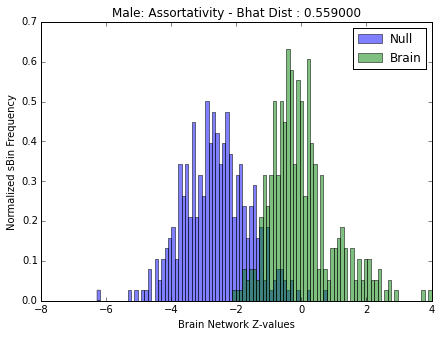

Mplex :  3
0/366 
250/366 


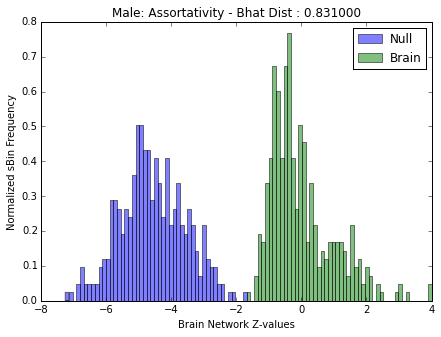

Mplex :  4
0/453 
250/453 


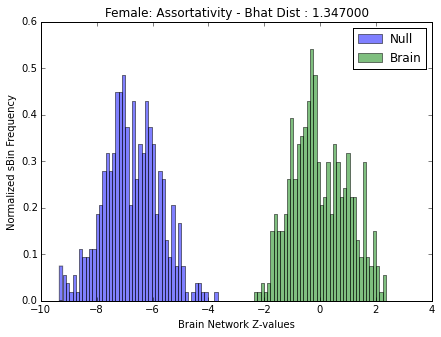

Mplex :  5
0/453 
250/453 


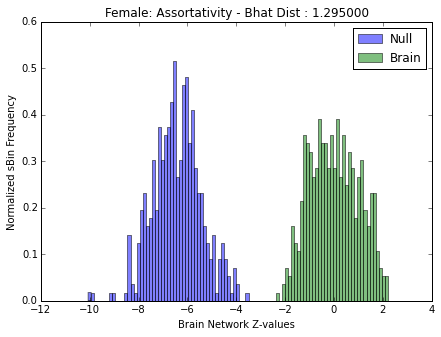

Mplex :  6
0/453 
250/453 


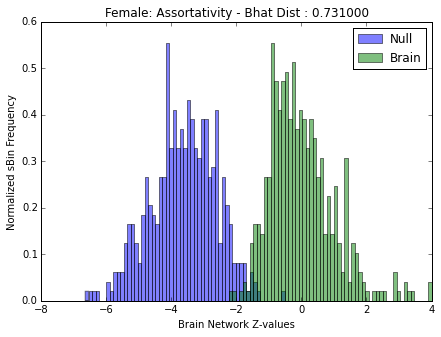

Mplex :  7
0/453 
250/453 


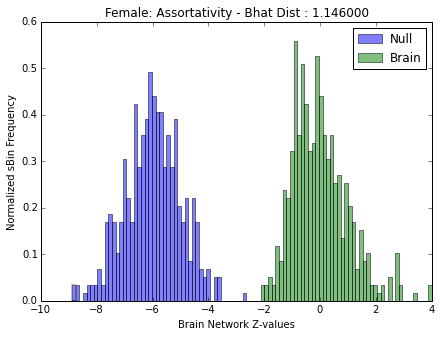

In [26]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.assortativity_bin(net,0)
            btwn_null = bct.assortativity_bin(null,0)
        else:
            btwn = bct.assortativity_wei(net,0)
            btwn_null = bct.assortativity_wei(null,0)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    if mp_idx< 4:
        plot_hist(nb,['Assortativity'],'Male')
    else:
        plot_hist(nb,['Assortativity'],'Female')

### 3B. Rich Club

Mplex :  0
0/366 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/core.py:354: RuntimeWarning: invalid value encountered in double_scalars
  R[k] = Ek[k] / (Nk[k] * (Nk[k] - 1))


250/366 
Mplex :  1
0/366 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/core.py:448: RuntimeWarning: invalid value encountered in double_scalars
  Rw[k] = Wr / np.sum(wrank_r)


250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


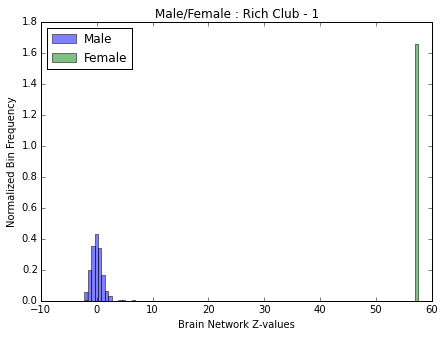

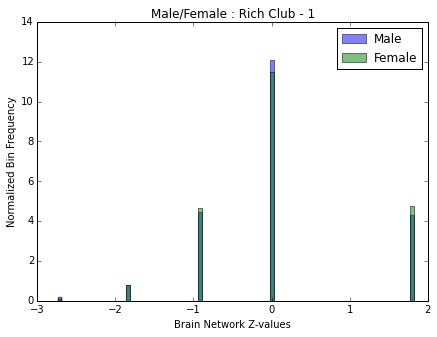

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5684: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


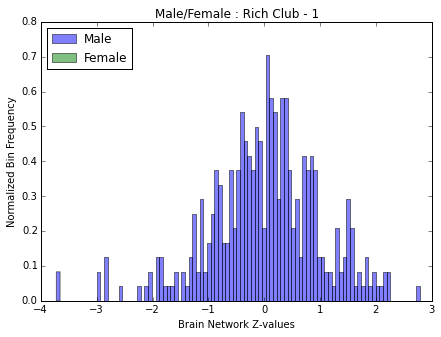

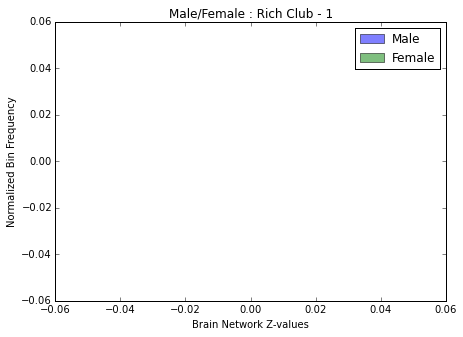

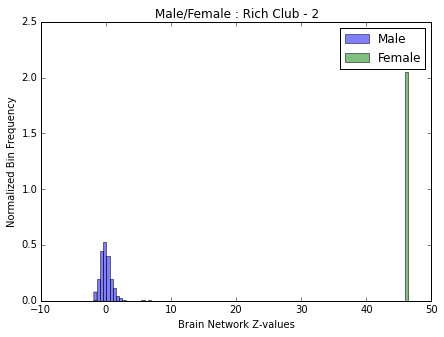

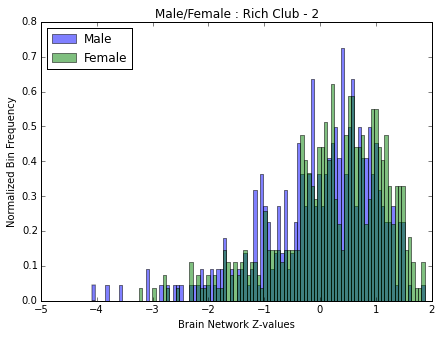

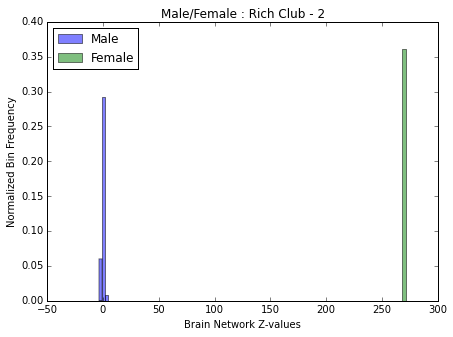

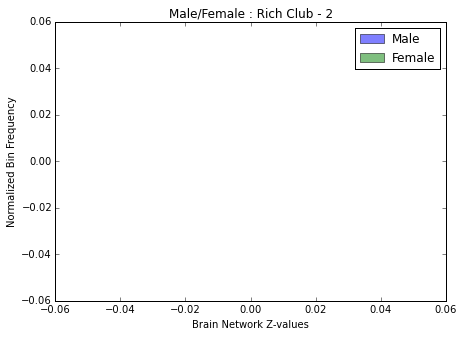

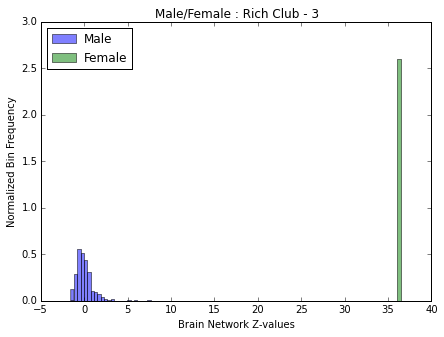

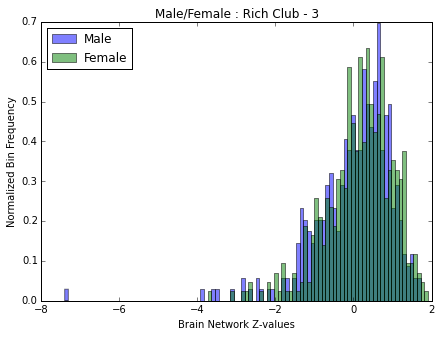

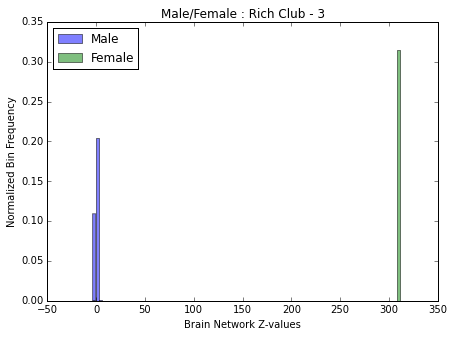

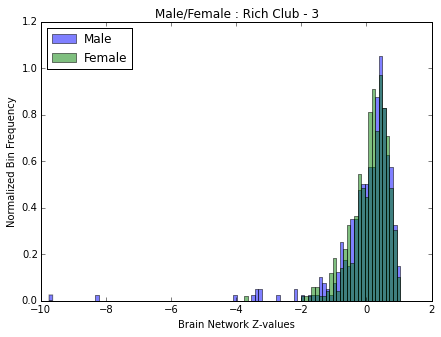

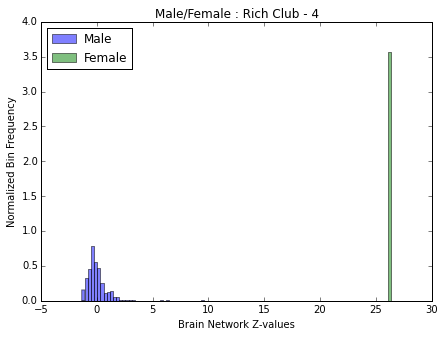

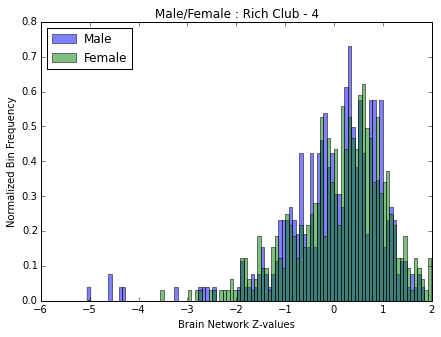

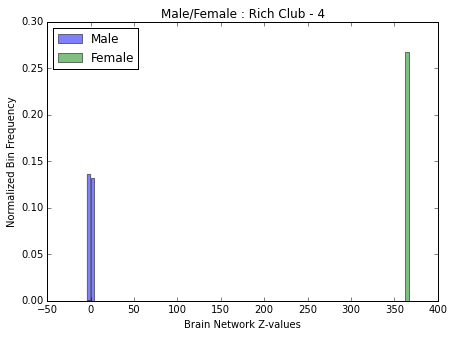

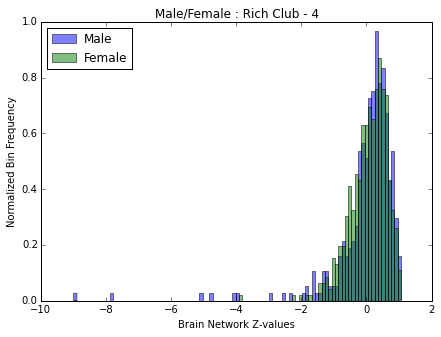

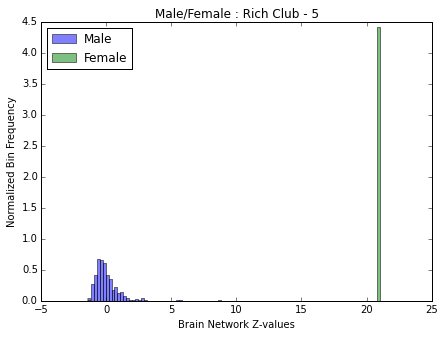

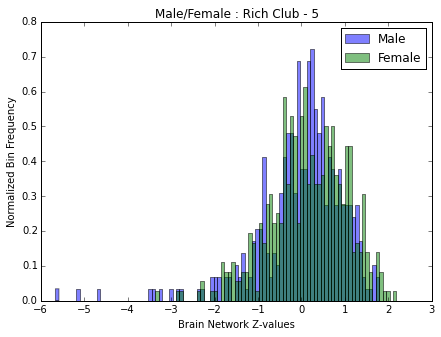

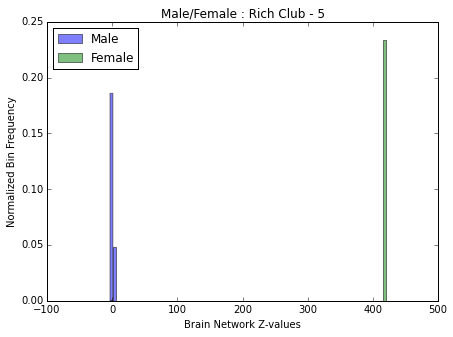

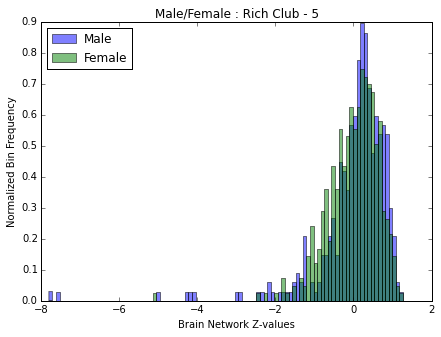

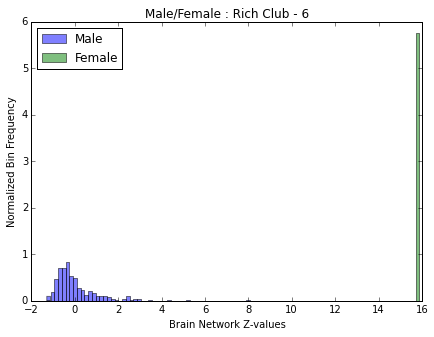

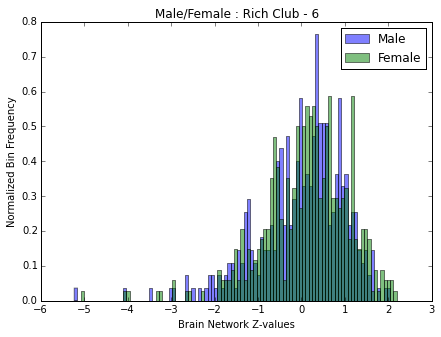

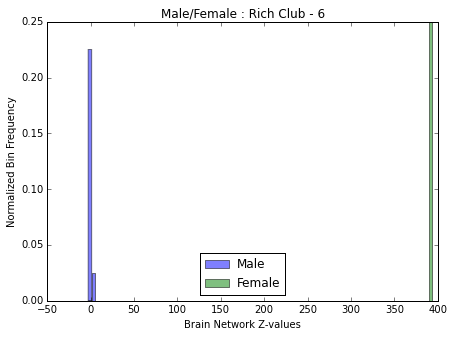

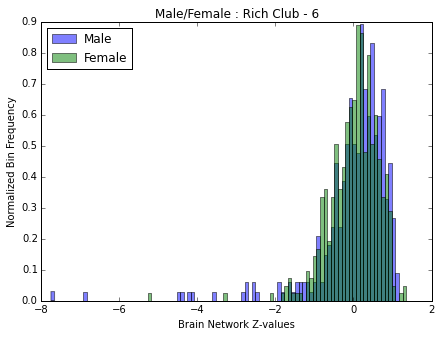

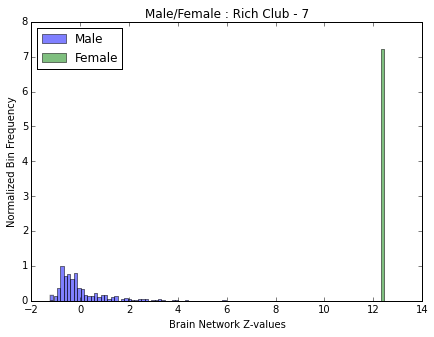

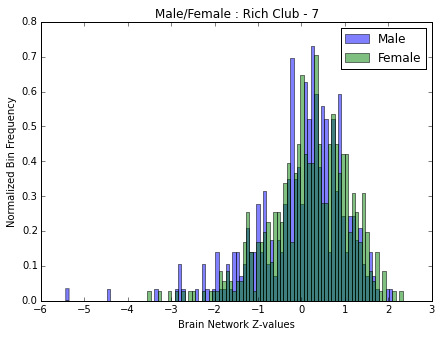

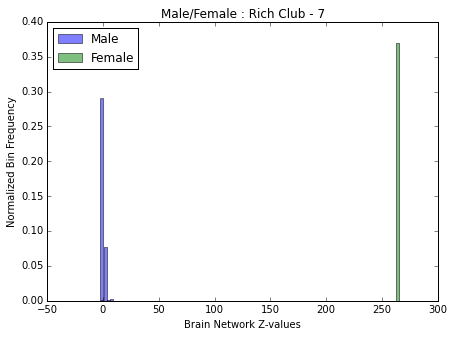

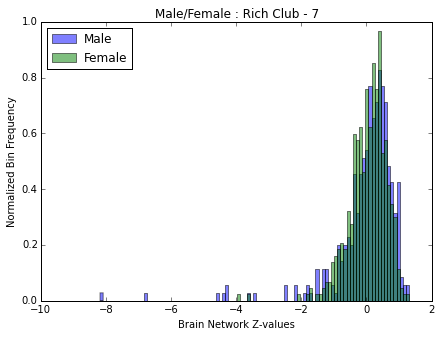

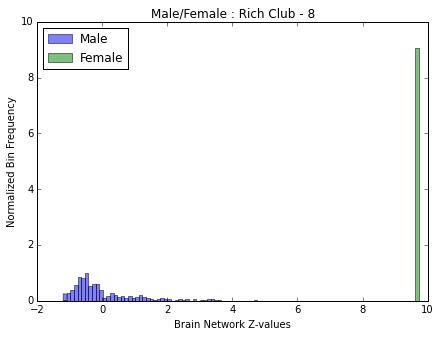

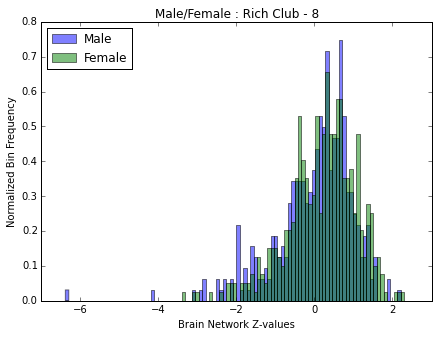

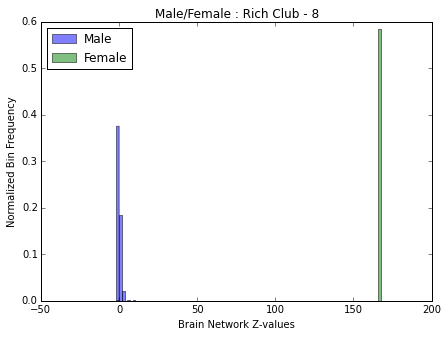

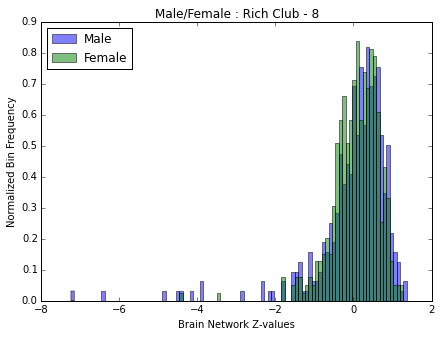

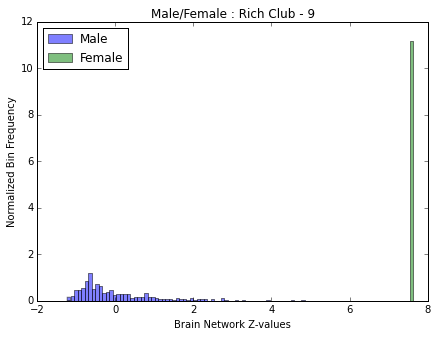

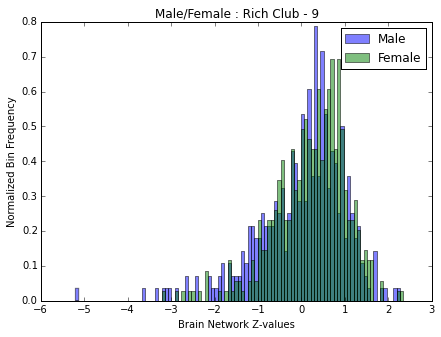

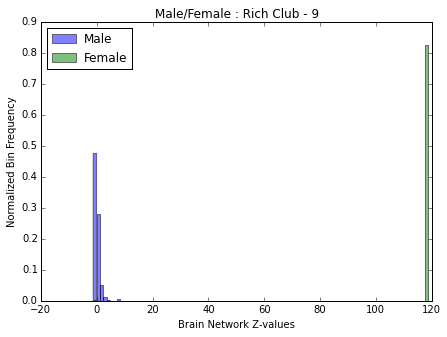

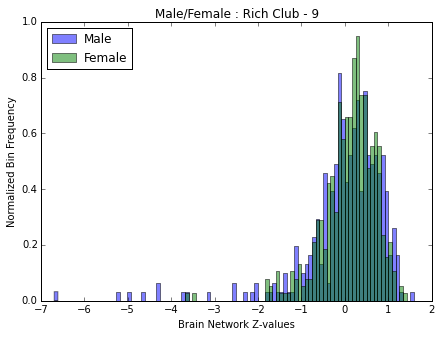

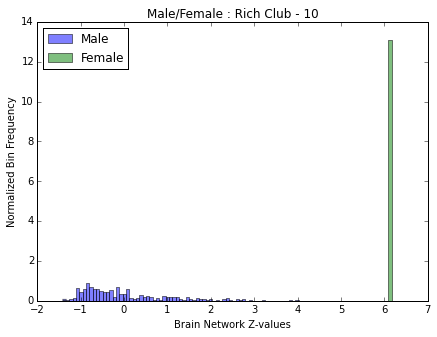

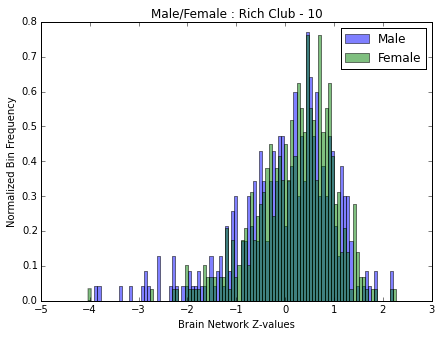

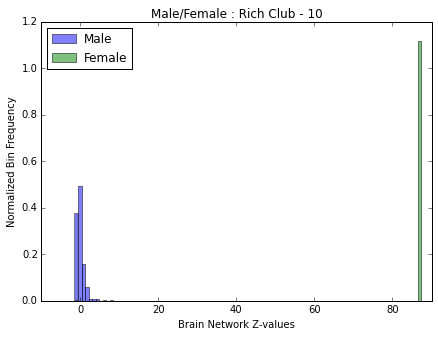

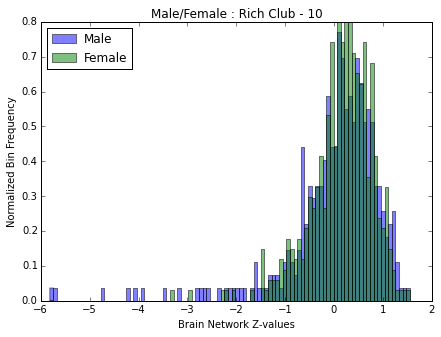

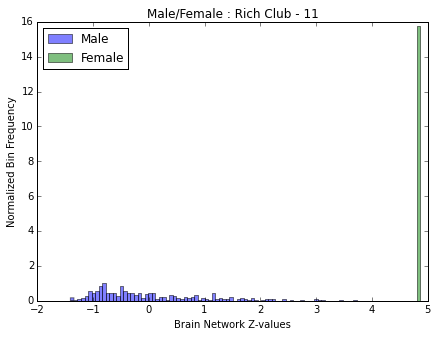

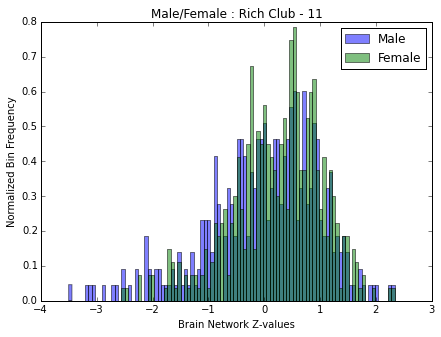

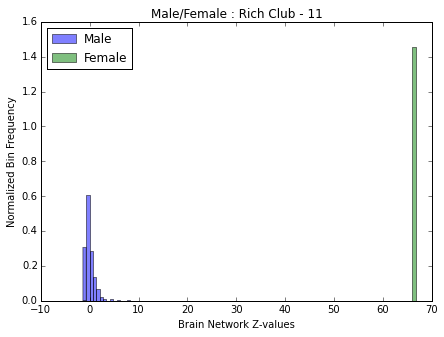

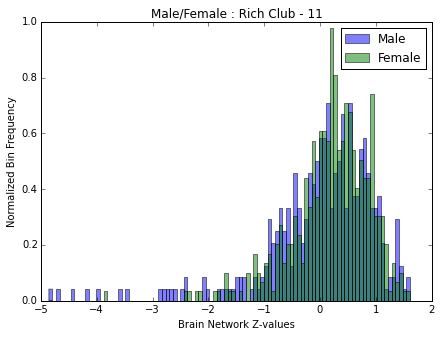

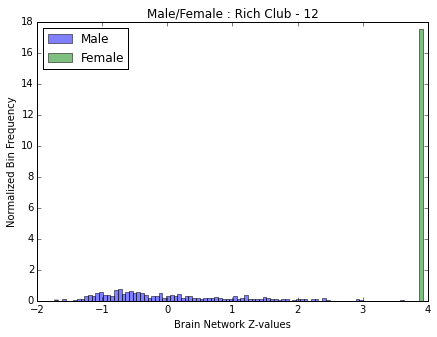

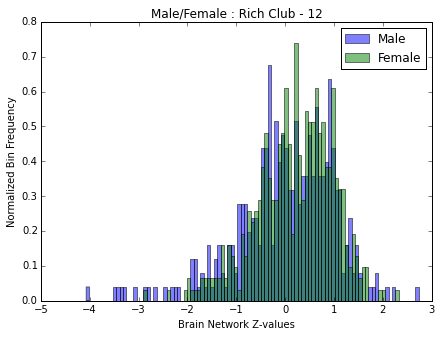

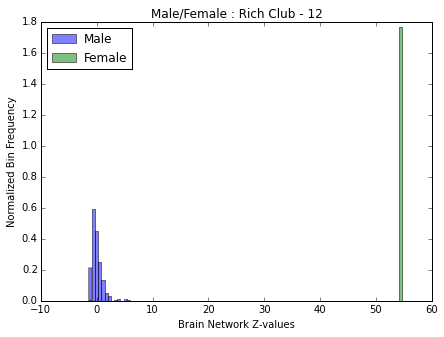

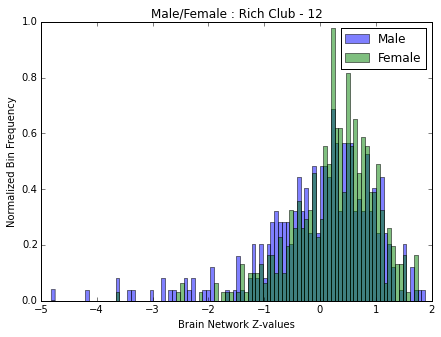

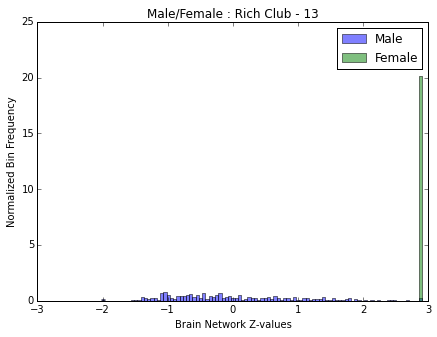

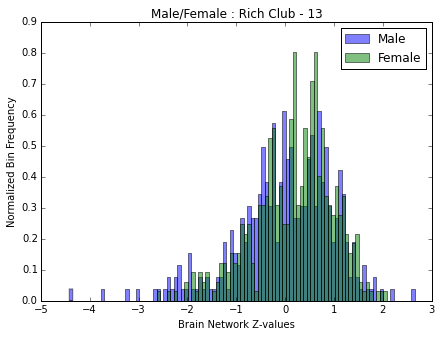

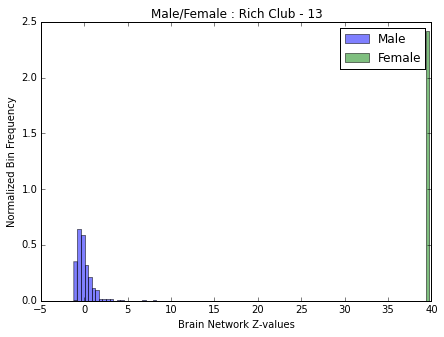

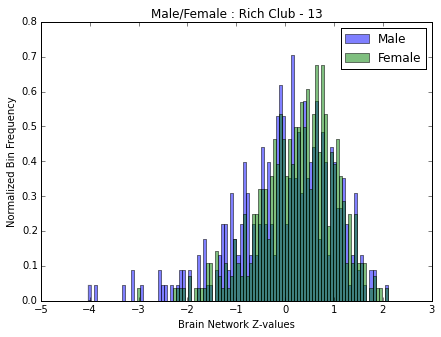

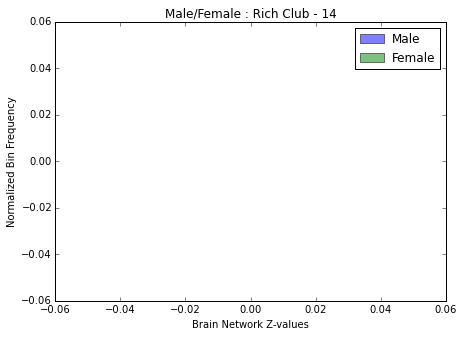

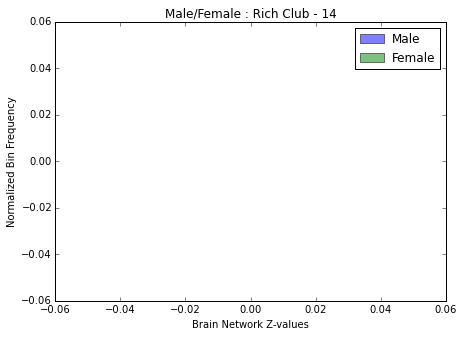

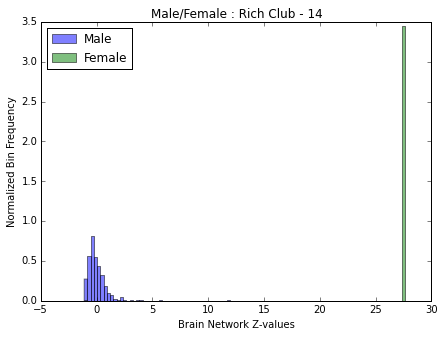

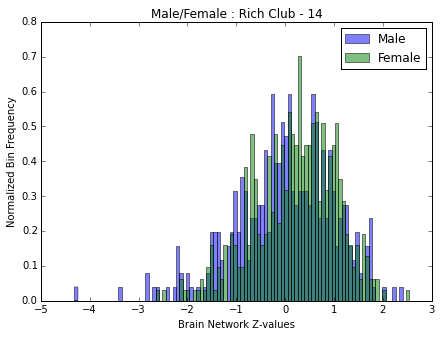

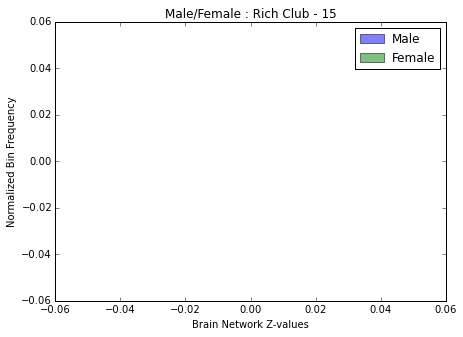

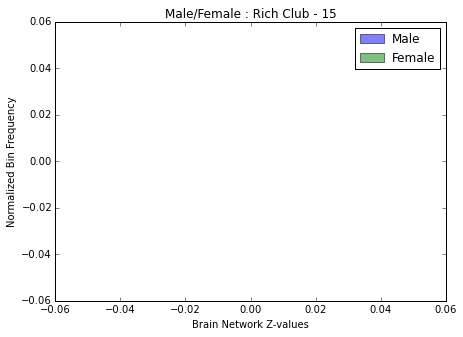

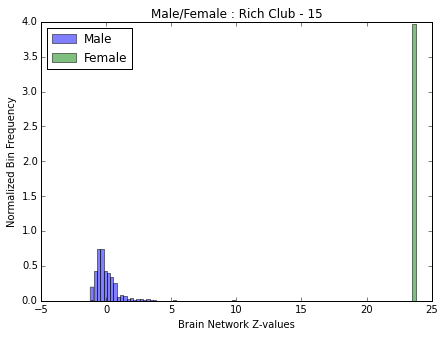

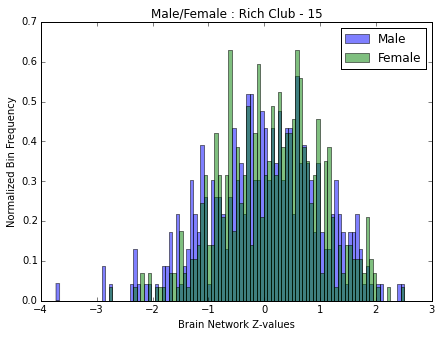

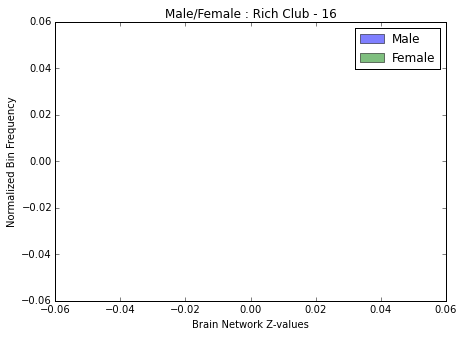

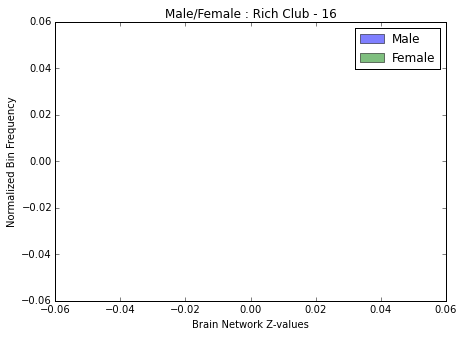

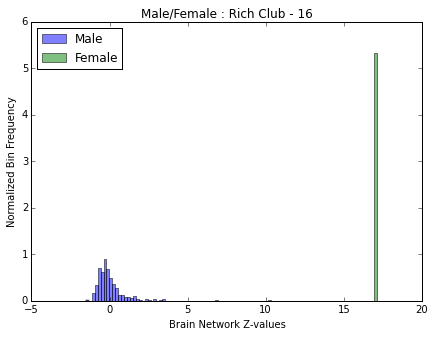

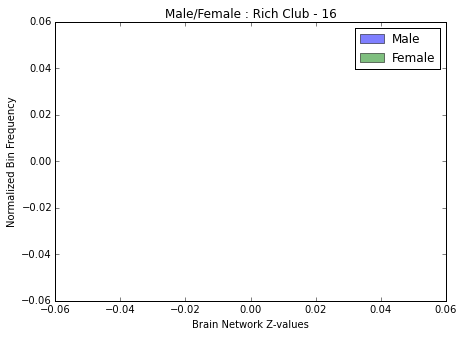

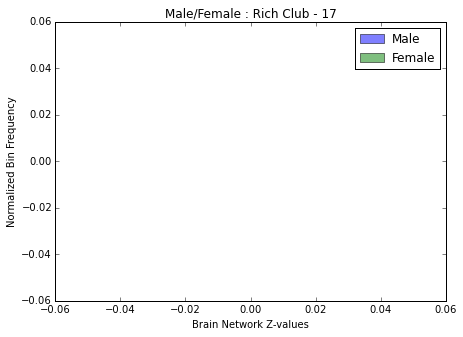

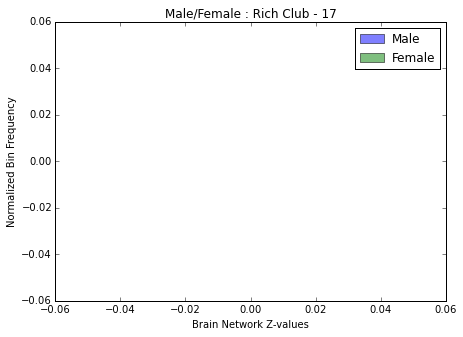

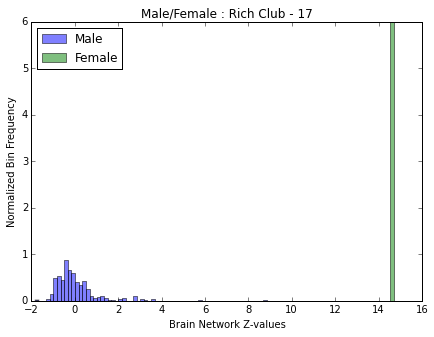

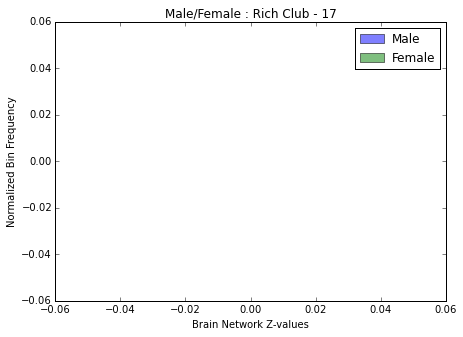

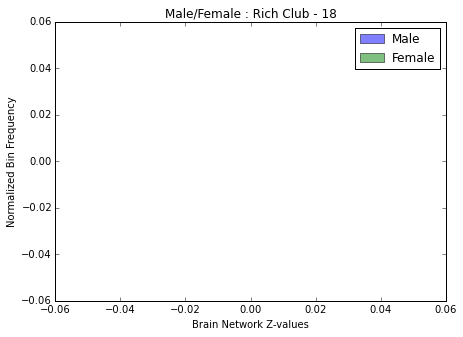

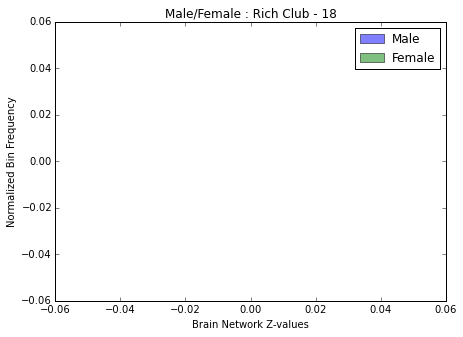

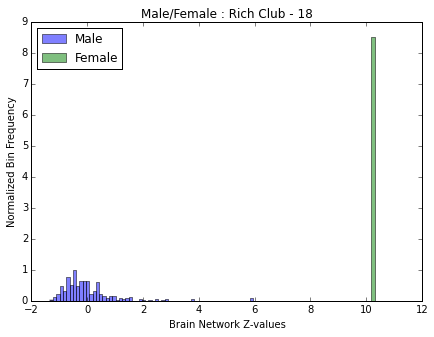

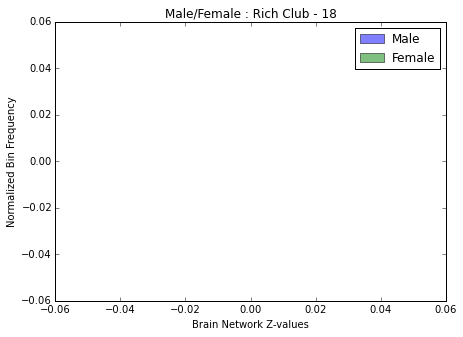

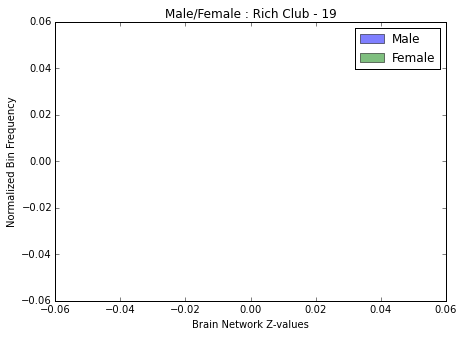

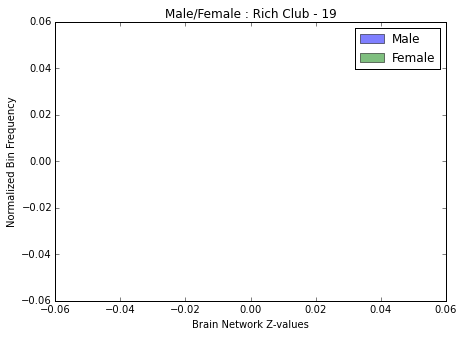

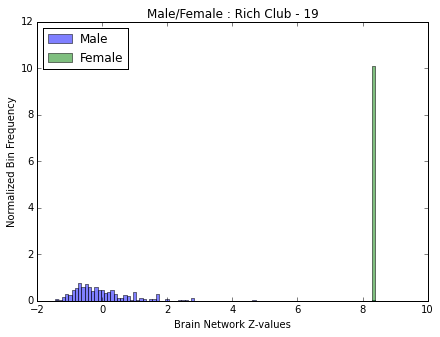

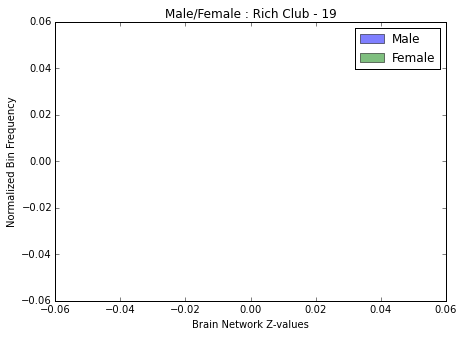

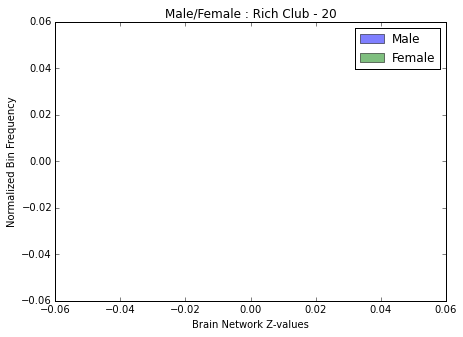

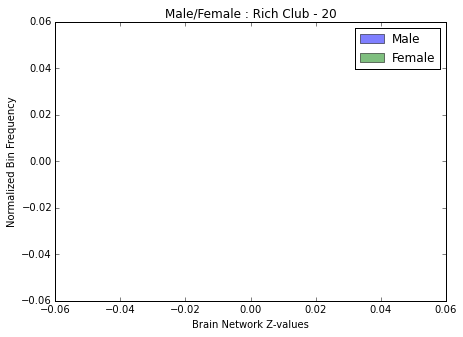

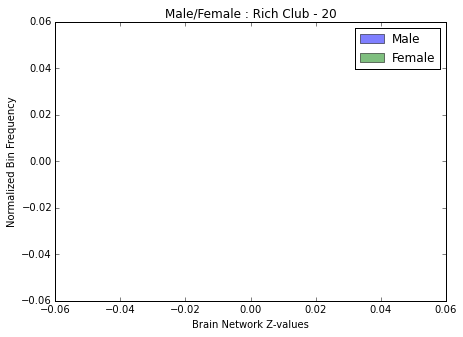

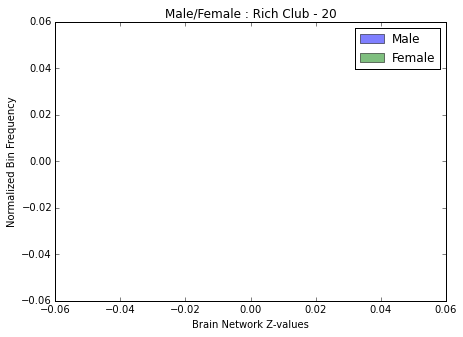

In [19]:
allvals = np.zeros((len(mp_list),455,20))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((20,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx == 0 or mp_idx == 2:
            btwn,_,_ = bct.rich_club_bu(net,20)
            btwn_null,_,_ = bct.rich_club_bu(null,20)
        else:
            btwn = bct.rich_club_wu(net,20)
            btwn_null = bct.rich_club_wu(null,20)
        for ii in range(20):
            nb[ii,net_idx,0] = btwn[ii]
            nb[ii,net_idx,1] = btwn_null[ii]
            allvals[mp_idx,net_idx,ii] = btwn[ii]
    #if mp_idx < 4:
    #    plot_hist(nb,['Rich Club']*20,'Male')
    #else:
    #    plot_hist(nb,['Rich Club']*20,'Female')
plot_together(allvals,['Rich Club - %i'%(i+1) for i in range(20)])

## 4. Degree

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


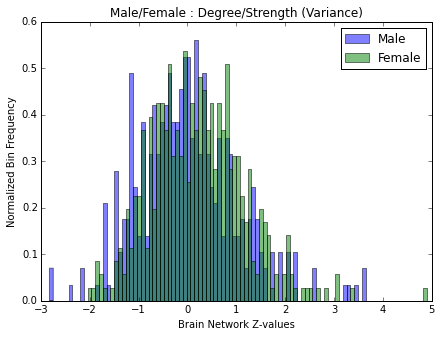

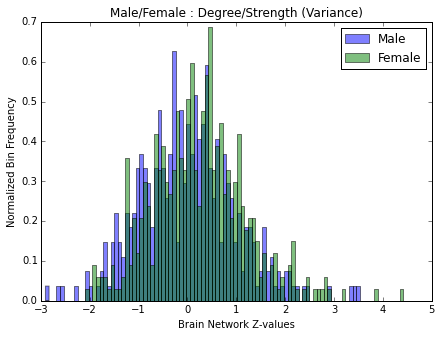

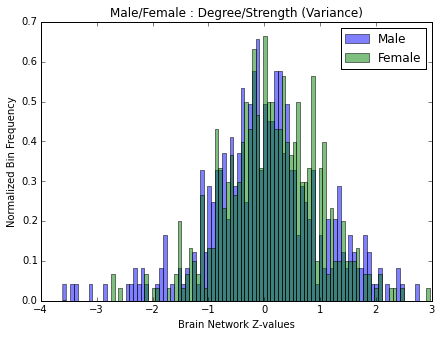

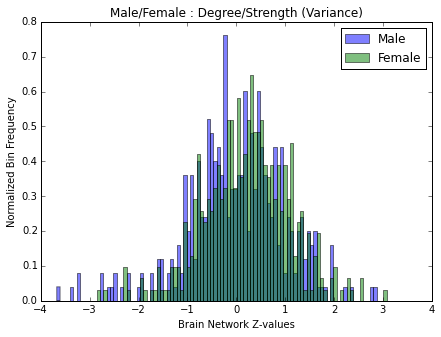

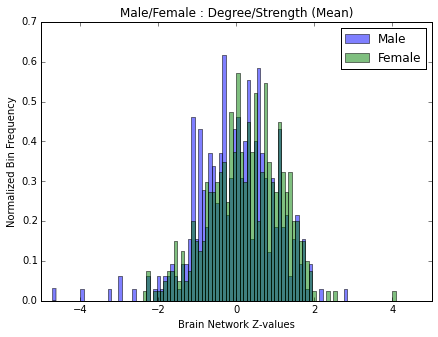

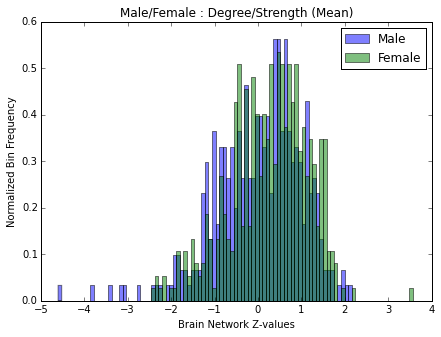

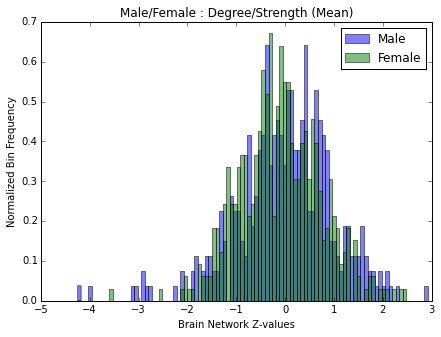

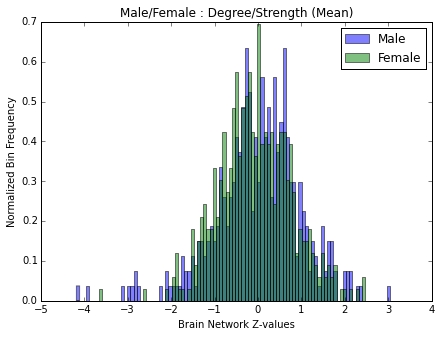

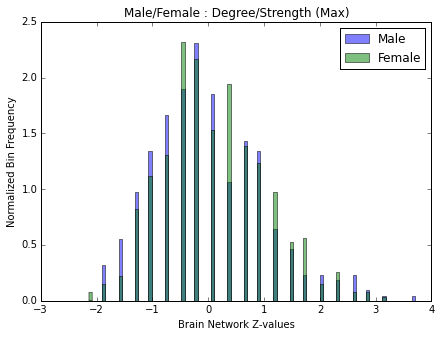

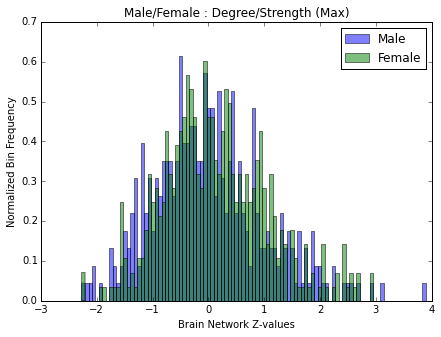

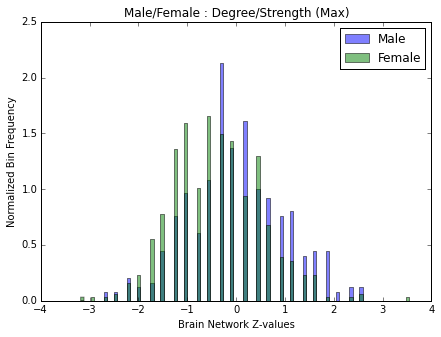

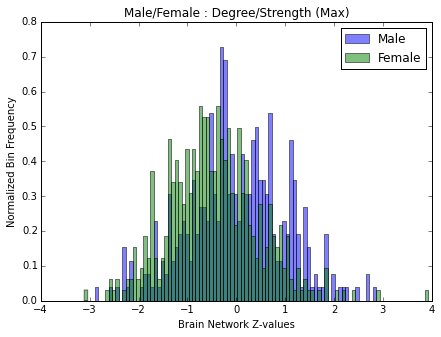

In [18]:
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.degrees_und(net)
            btwn_null = bct.degrees_und(null)
        else:
            btwn = bct.strengths_und(net)
            btwn_null = bct.strengths_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'],'Male')
    #else:
     #   plot_hist(nb,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'],'Female')
plot_together(allvals,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'])

Mplex :  0
0/366 
250/366 


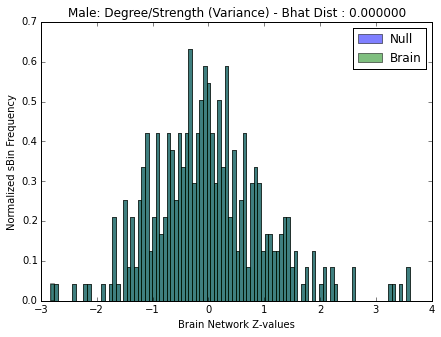

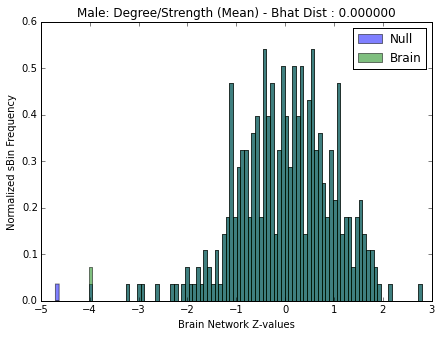

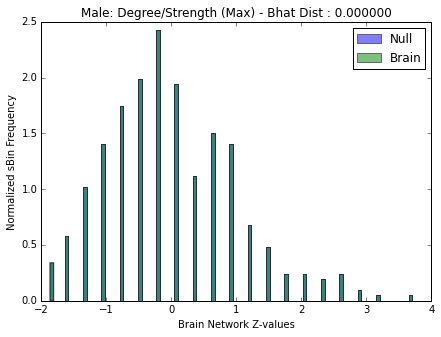

Mplex :  1
0/366 
250/366 


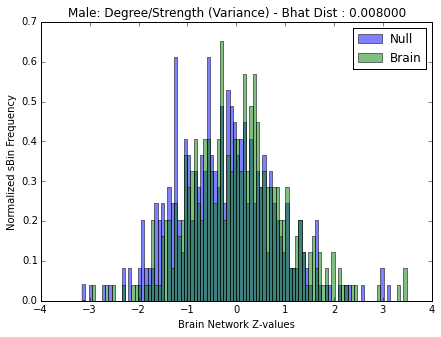

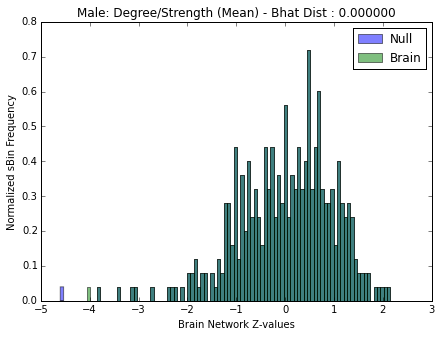

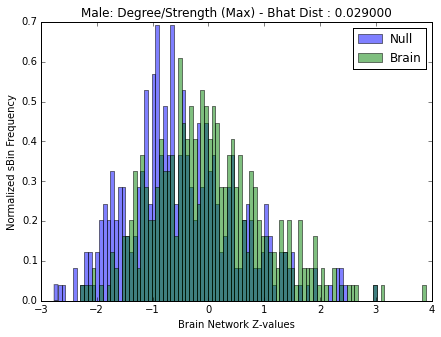

Mplex :  2
0/366 
250/366 


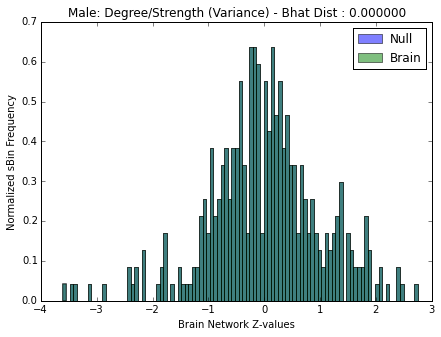

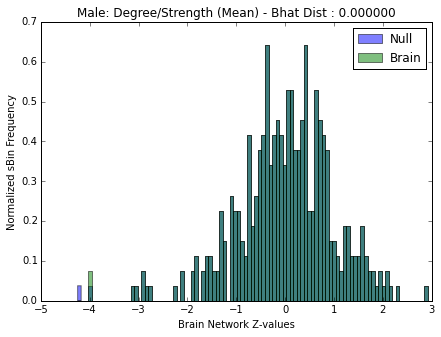

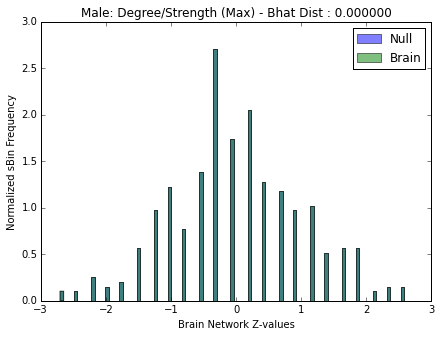

Mplex :  3
0/366 
250/366 


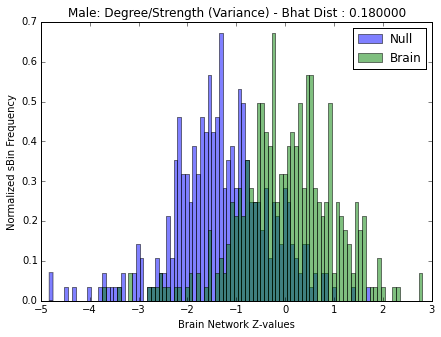

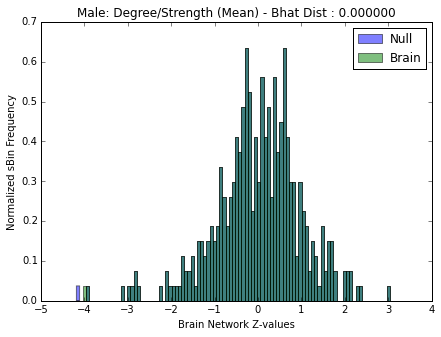

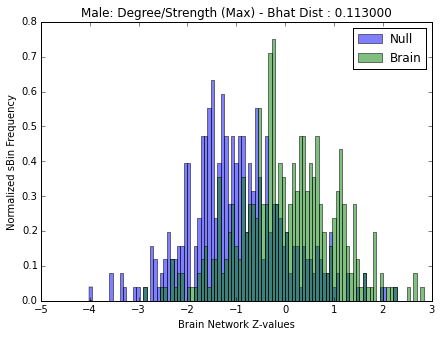

Mplex :  4
0/453 
250/453 


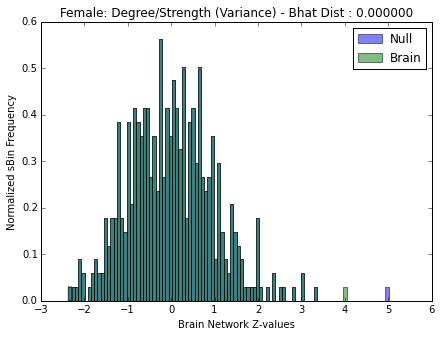

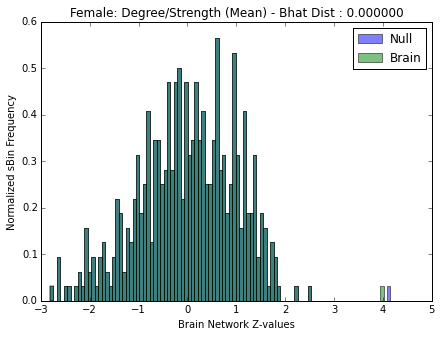

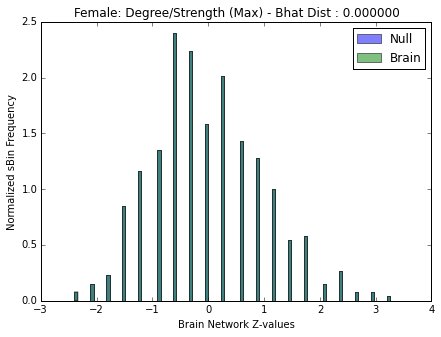

Mplex :  5
0/453 
250/453 


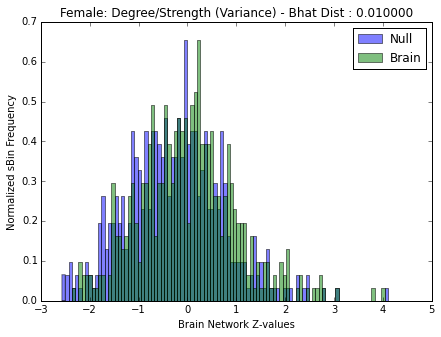

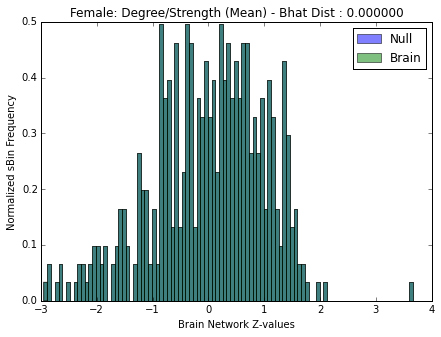

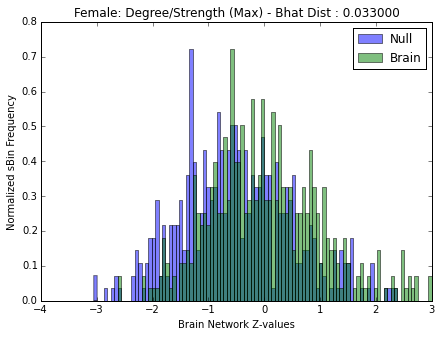

Mplex :  6
0/453 
250/453 


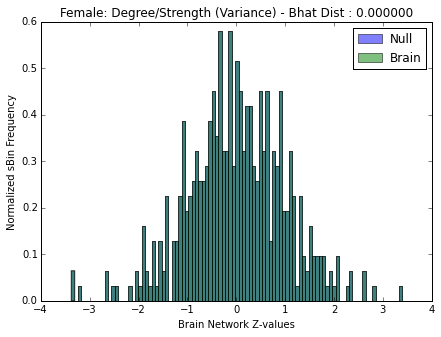

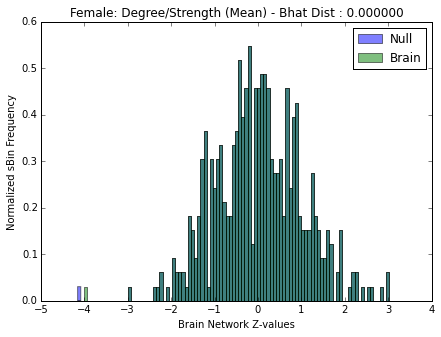

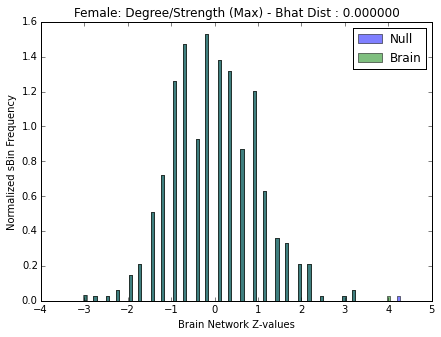

Mplex :  7
0/453 
250/453 


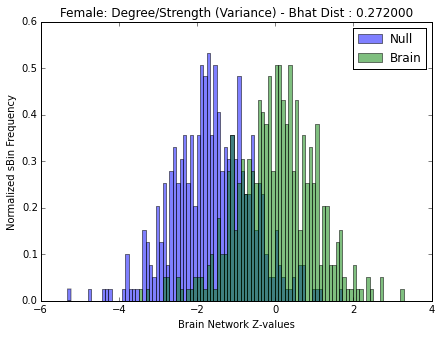

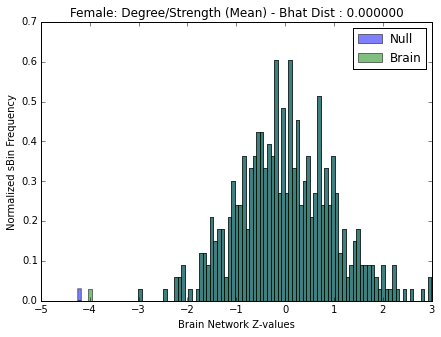

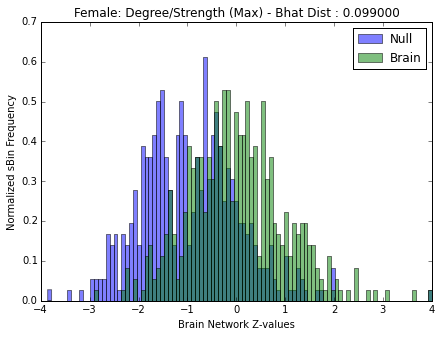

In [29]:
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.degrees_und(net)
            btwn_null = bct.degrees_und(null)
        else:
            btwn = bct.strengths_und(net)
            btwn_null = bct.strengths_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'],'Male')
    #else:
     #   plot_hist(nb,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'],'Female')


## 5. Distance

### 5A. Characteristic Path Length

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


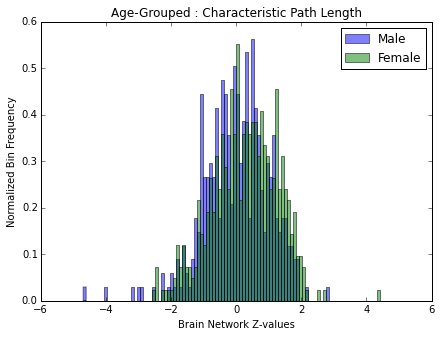

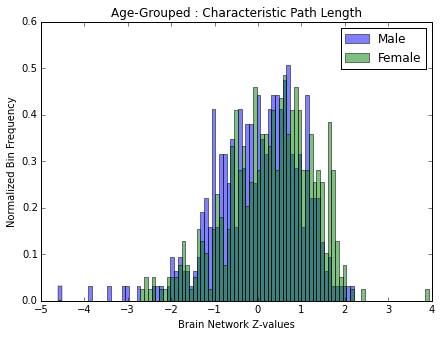

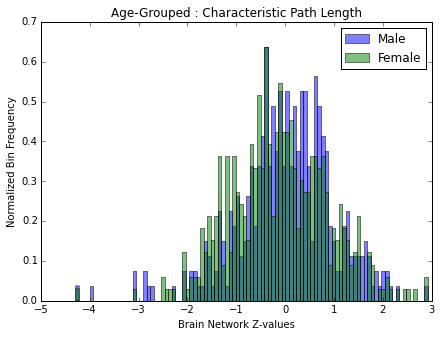

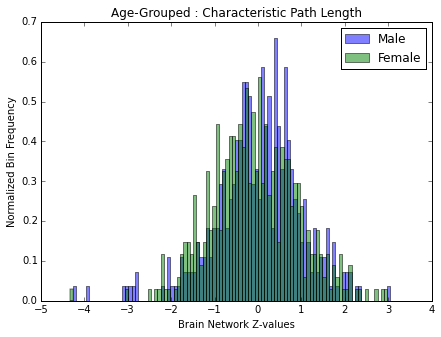

In [9]:
allvals = np.zeros((len(mp_list),455,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_,_,_,_ = bct.charpath(net+1e-7)
        btwn_null,_,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if mp_idx < 4:
    #    plot_hist(nb,['Characteristic Path Length'],'Male')
    #else:
    #    plot_hist(nb,['Characteristic Path Length'],'Female')
plot_together(allvals,['Characteristic Path Length'])

### 5B. Efficiency from CharPath

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


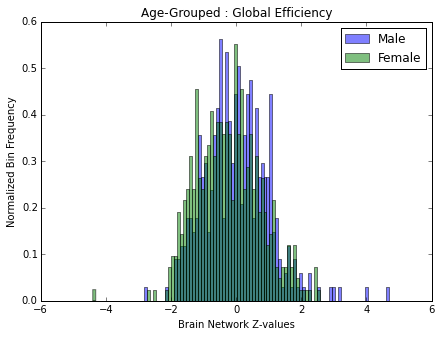

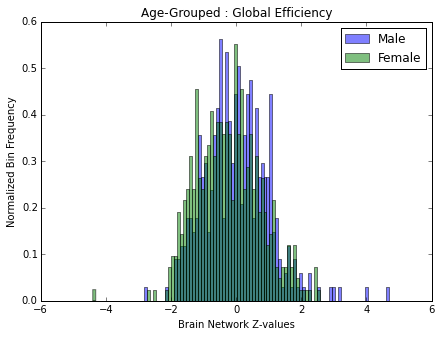

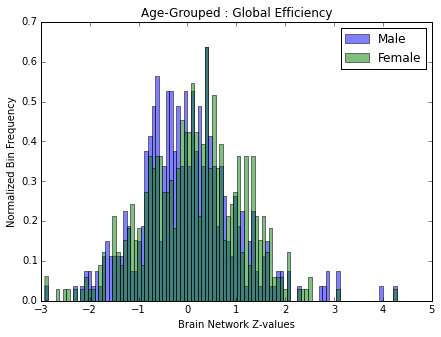

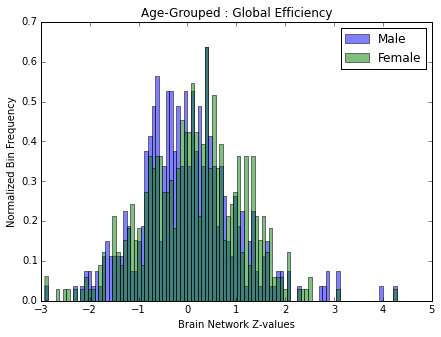

In [10]:
allvals = np.zeros((len(mp_list),455,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn,_,_,_ = bct.charpath(net+1e-7)
        _,btwn_null,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if mp_idx < 4:
    #    plot_hist(nb,['Global Efficiency'],'Male')
    #else:
    #    plot_hist(nb,['Global Efficiency'],'Female')
plot_together(allvals,['Global Efficiency'])

### 5C. Global Efficiency

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


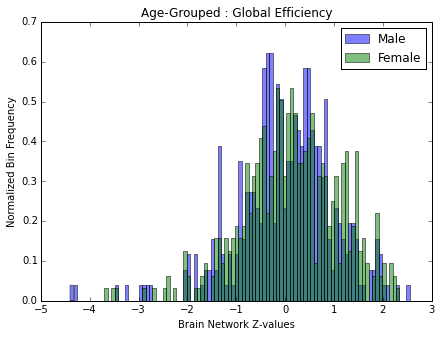

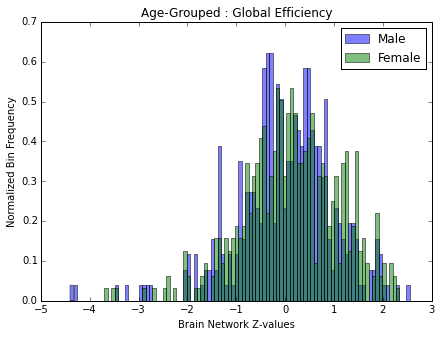

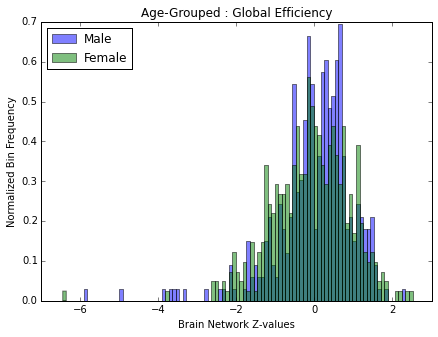

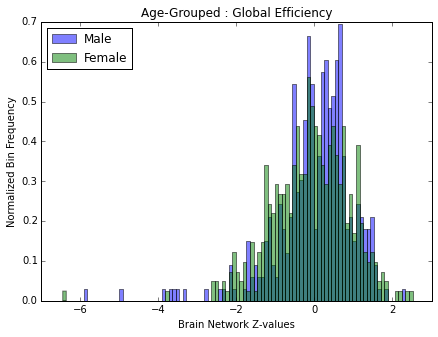

In [11]:
allvals = np.zeros((len(mp_list),455,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_ = bct.efficiency_bin(net)
        btwn_null,_= bct.efficiency_bin(null)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if mp_idx < 4:
    #   plot_hist(nb,['Global Efficiency'],'Male')
    #else:
    #    plot_hist(nb,['Global Efficiency'],'Female')
plot_together(allvals,['Global Efficiency'])

### 5D. Local Efficiency 

Mplex :  0
0/366 
250/366 
Mplex :  1
0/366 
250/366 
Mplex :  2
0/366 
250/366 
Mplex :  3
0/366 
250/366 
Mplex :  4
0/453 
250/453 
Mplex :  5
0/453 
250/453 
Mplex :  6
0/453 
250/453 
Mplex :  7
0/453 
250/453 


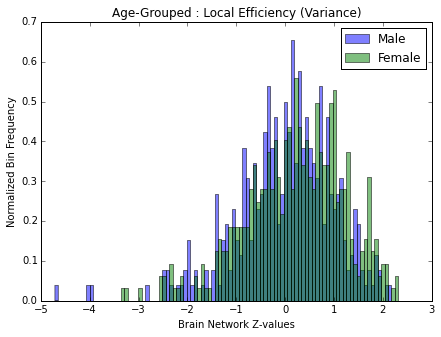

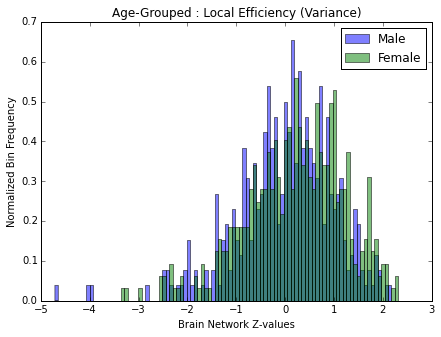

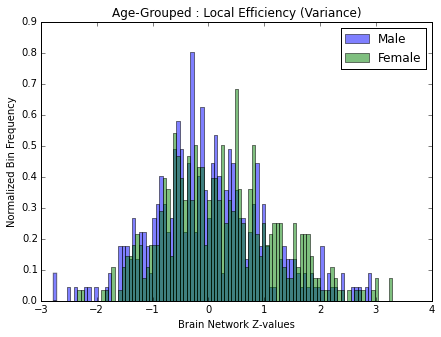

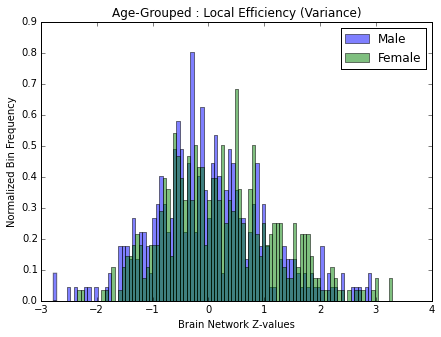

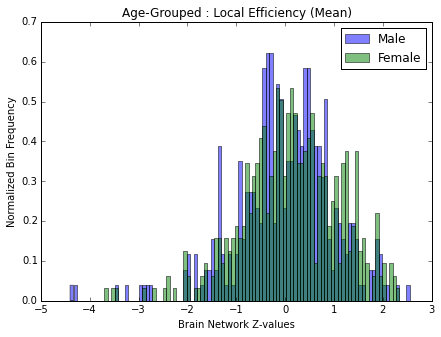

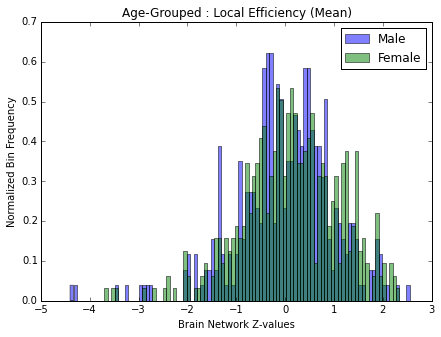

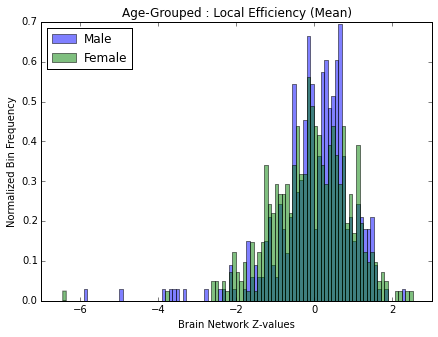

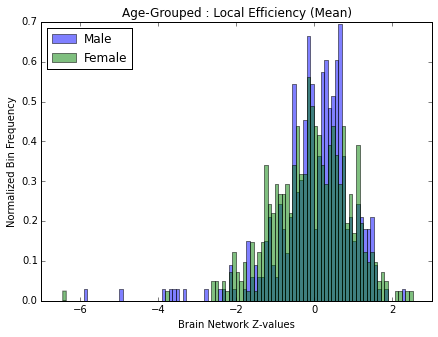

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


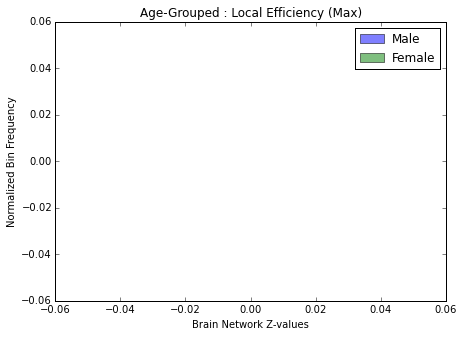

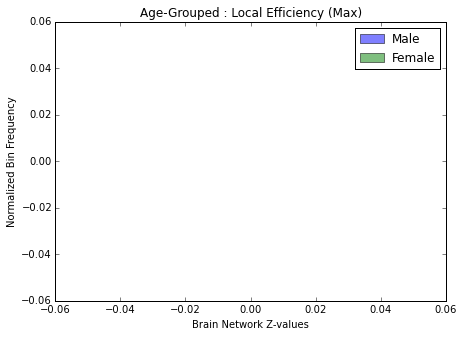

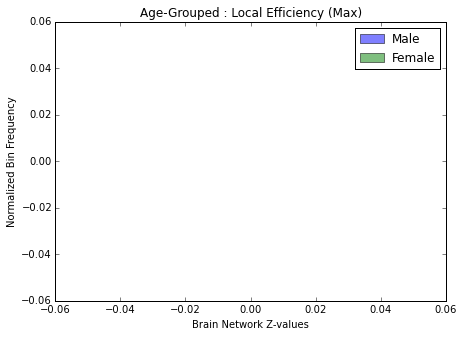

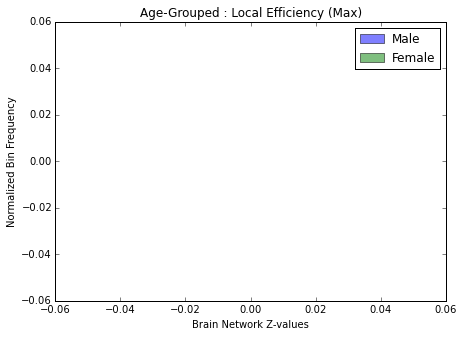

In [12]:
allvals = np.zeros((len(mp_list),455,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn = bct.efficiency_bin(net)
        _,btwn_null = bct.efficiency_bin(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if mp_idx < 4:
    #    plot_hist(nb,['Local Efficiency (Variance)','Local Efficiency (Mean)', 'Local Efficiency (Max)'],'Male')
    #else:
    #    plot_hist(nb,['Local Efficiency (Variance)','Local Efficiency (Mean)', 'Local Efficiency (Max)'],'Female')
plot_together(allvals,['Local Efficiency (Variance)','Local Efficiency (Mean)', 'Local Efficiency (Max)'])

### 5E. Eccentricity

Mplex :  0
0/366 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/distance.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D = 1 / D  # invert distance


250/366 


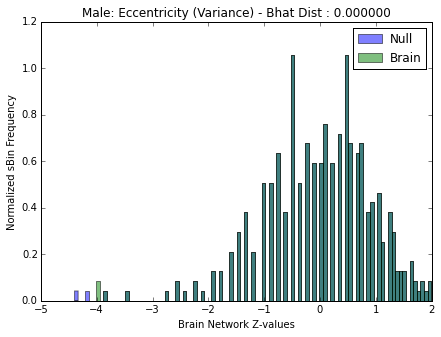

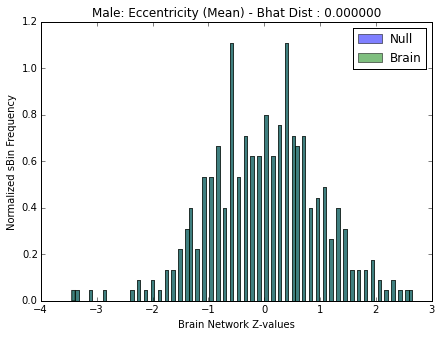

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


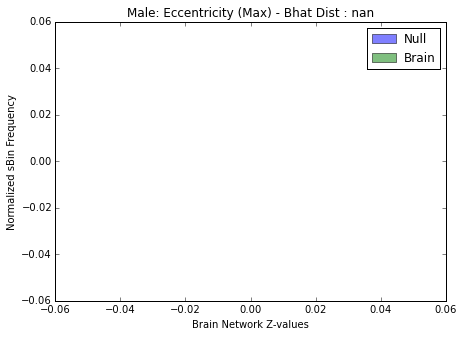

Mplex :  1
0/366 
250/366 


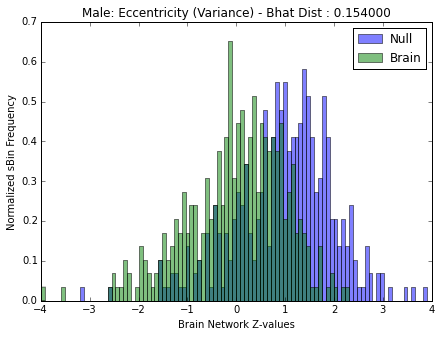

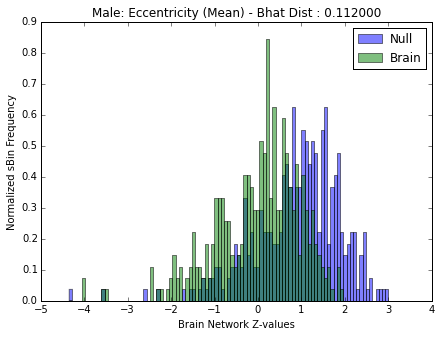

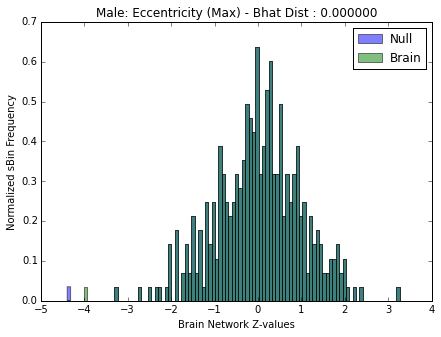

Mplex :  2
0/366 
250/366 


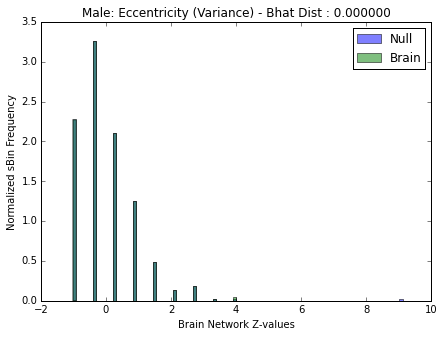

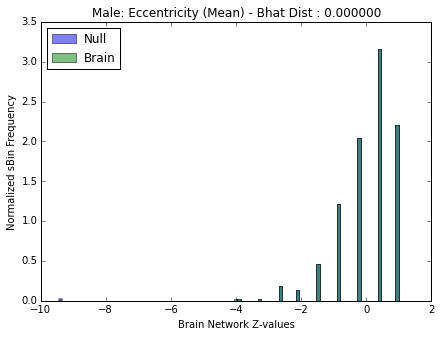

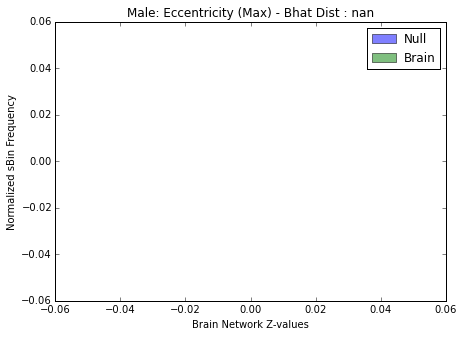

Mplex :  3
0/366 
250/366 


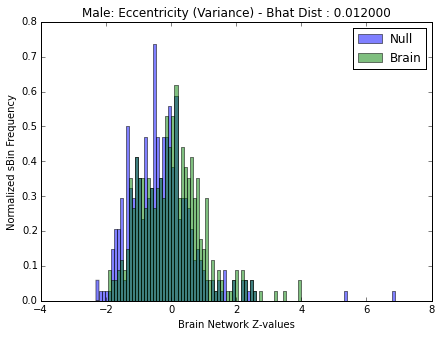

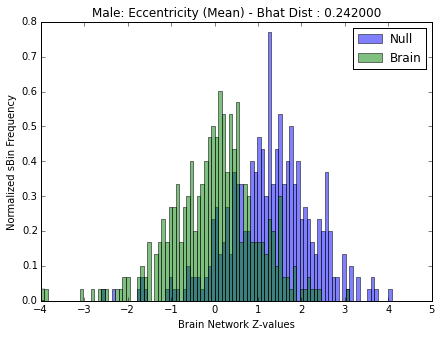

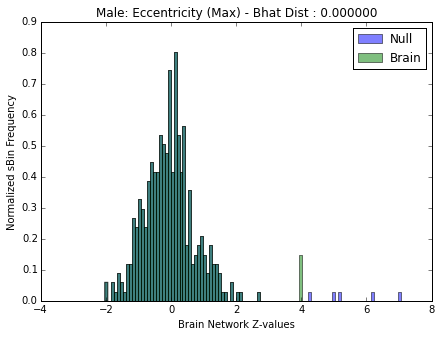

Mplex :  4
0/453 
250/453 


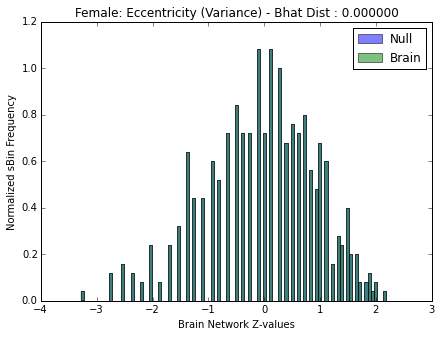

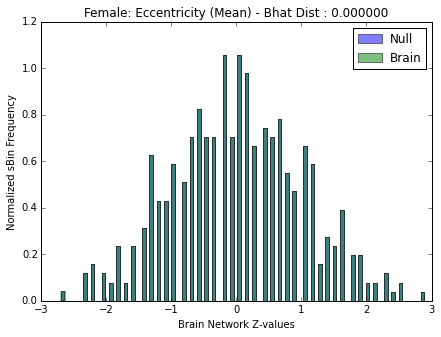

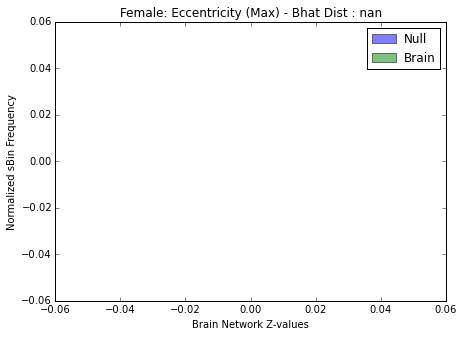

Mplex :  5
0/453 
250/453 


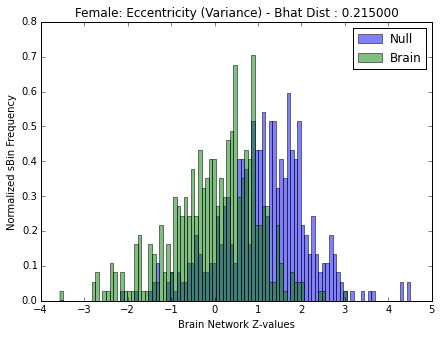

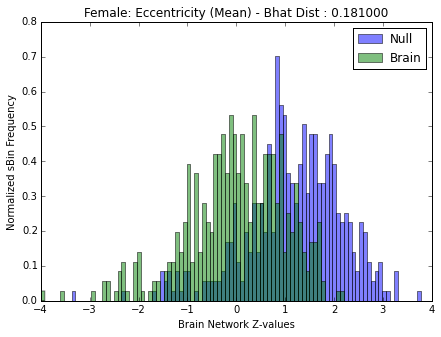

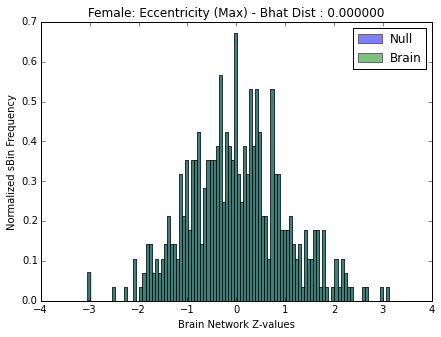

Mplex :  6
0/453 
250/453 


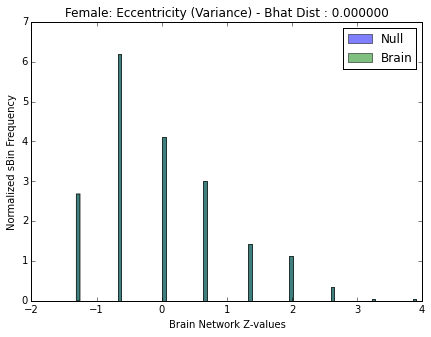

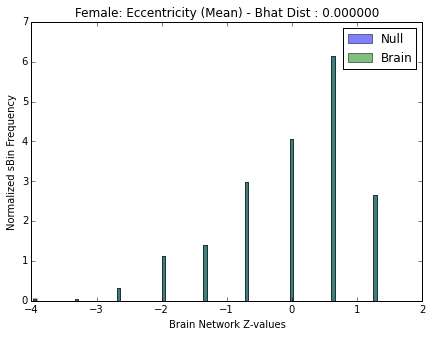

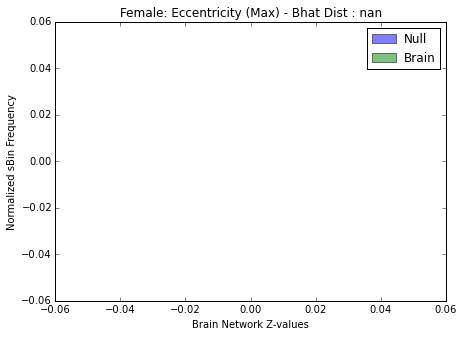

Mplex :  7
0/453 
250/453 


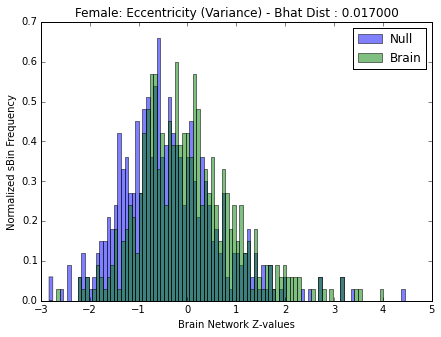

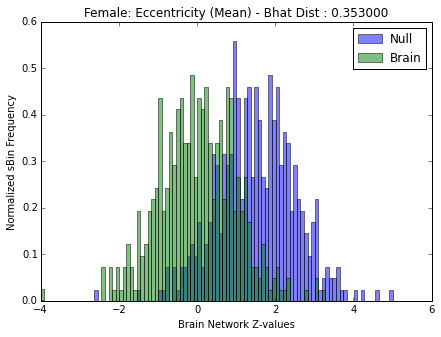

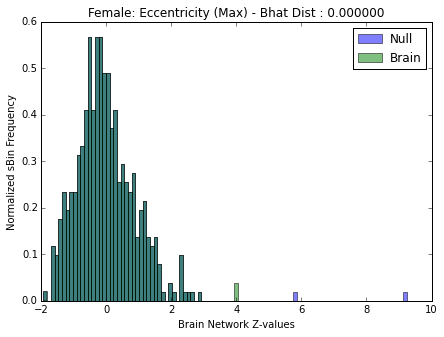

In [34]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,_,btwn,_,_ = bct.charpath(net)
        _,_,btwn_null,_,_ = bct.charpath(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if mp_idx < 4:
        plot_hist(nb,['Eccentricity (Variance)','Eccentricity (Mean)', 'Eccentricity (Max)'],'Male')
    else:
        plot_hist(nb,['Eccentricity (Variance)','Eccentricity (Mean)', 'Eccentricity (Max)'],'Female')